# [SF-DST] Car Price prediction

In [253]:
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


## DATA

In [255]:
DATA_DIR = '/kaggle/input/'
df_test = pd.read_csv(DATA_DIR+'sfdst-car-price-prediction-data/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'sfdst-car-price-prediction-data/sample_submission.csv')

In [256]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sell_id  34686 non-null  int64
 1   price    34686 non-null  int64
dtypes: int64(2)
memory usage: 542.1 KB


In [257]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

Посмотрим, какие данные есть в "test".

In [258]:
df_test.sample(10)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
15602,минивэн,MERCEDES,https://auto.ru/cars/used/sale/mercedes/viano/...,серый,NaN,Добрый день. Продаётся шикарный автомобиль в о...,2.1 LTR,163 N12,NaN,дизель,...,MINIVAN AUTOMATIC 2.1,автоматическая,EUROPEAN,3 или более,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен
15912,внедорожник 5 дв.,MERCEDES,https://auto.ru/cars/used/sale/mercedes/gle_kl...,чёрный,NaN,Комфорт: 9. Безопасность: 9. Салон: 5. Мультим...,5.5 LTR,585 N12,"{""cruise-control"":true,""asr"":true,""front-seats...",бензин,...,ALLROAD_5_DOORS AUTOMATIC 5.5,автоматическая,EUROPEAN,3 или более,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен
17707,седан,MERCEDES,https://auto.ru/cars/used/sale/mercedes/c_klas...,чёрный,NaN,Автомобиль приобретался за наличные у официаль...,1.6 LTR,150 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,...,SEDAN AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,задний,Левый,Не требует ремонта,Растаможен
2830,седан,AUDI,https://auto.ru/cars/used/sale/audi/a6/1101168...,чёрный,NaN,Внимание! Только для клиентов AVILON Автомобил...,1.8 LTR,190 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,...,SEDAN ROBOT 1.8,роботизированная,EUROPEAN,2 владельца,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
734,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/rapid/110...,белый,"{""id"":""21032343"",""name"":""Style"",""available_opt...","Один хозяин, максимальная комплектация, выгодн...",1.6 LTR,90 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,3 года и 1 месяц,Оригинал,передний,Левый,Не требует ремонта,Растаможен
19127,компактвэн,TOYOTA,https://auto.ru/cars/used/sale/toyota/verso/11...,серебристый,NaN,Без технических и юридических проблем. Обслужи...,1.8 LTR,147 N12,"{""cruise-control"":true,""esp"":true,""airbag-driv...",бензин,...,COMPACTVAN MECHANICAL 1.8,механическая,JAPANESE,2 владельца,7 лет и 5 месяцев,Оригинал,передний,Левый,Не требует ремонта,Растаможен
20575,седан,TOYOTA,https://auto.ru/cars/used/sale/toyota/crown/10...,белый,NaN,"На ходу,проблем ни каких нет,завёл,сел,поехал\...",2.0 LTR,135 N12,NaN,бензин,...,SEDAN AUTOMATIC 2.0,автоматическая,JAPANESE,3 или более,NaN,Оригинал,задний,Правый,Не требует ремонта,Растаможен
3527,седан,AUDI,https://auto.ru/cars/used/sale/audi/a8/1101264...,зелёный,NaN,Двигатель 6.0 W12\nВсе подробности по комплект...,6.0 LTR,450 N12,"{""18-inch-wheels"":true,""leather"":true}",бензин,...,SEDAN AUTOMATIC 6.0,автоматическая,EUROPEAN,1 владелец,14 лет и 1 месяц,Оригинал,полный,Левый,Не требует ремонта,Растаможен
6664,седан,VOLVO,https://auto.ru/cars/used/sale/volvo/940/11001...,синий,NaN,"Здравствуйте.\nВладею ""Кирпичиком"" почти 4 год...",2.3 LTR,135 N12,"{""alloy-wheel-disks"":true,""bluetooth"":true,""au...",бензин,...,SEDAN MECHANICAL 2.3,механическая,EUROPEAN,2 владельца,3 года и 11 месяцев,Оригинал,задний,Левый,Не требует ремонта,Растаможен
26558,универсал 5 дв.,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/pass...,синий,NaN,продается авто на ходу,1.8 LTR,112 N12,NaN,бензин,...,WAGON_5_DOORS MECHANICAL 1.8,механическая,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [259]:
df_test['bodyType'].value_counts()

седан                      13147
внедорожник 5 дв.          12228
лифтбек                     2232
хэтчбек 5 дв.               2124
универсал 5 дв.             1276
минивэн                      995
купе                         824
компактвэн                   489
хэтчбек 3 дв.                485
пикап двойная кабина         280
купе-хардтоп                 158
внедорожник 3 дв.            115
родстер                       99
фургон                        97
кабриолет                     90
седан-хардтоп                 12
микровэн                       7
лимузин                        6
седан 2 дв.                    6
пикап одинарная кабина         5
пикап полуторная кабина        5
внедорожник открытый           3
тарга                          2
фастбек                        1
Name: bodyType, dtype: int64

In [260]:
df_test['brand'].value_counts()

BMW           4473
VOLKSWAGEN    4404
NISSAN        4393
MERCEDES      4180
TOYOTA        3913
AUDI          3421
MITSUBISHI    2843
SKODA         2741
VOLVO         1463
HONDA         1150
INFINITI       871
LEXUS          834
Name: brand, dtype: int64

In [261]:
df_test['car_url'].sample(5)

25044    https://auto.ru/cars/used/sale/volkswagen/golf...
25168    https://auto.ru/cars/used/sale/volkswagen/tran...
20663    https://auto.ru/cars/used/sale/toyota/rav_4/11...
16187    https://auto.ru/cars/used/sale/mercedes/glc_kl...
31276    https://auto.ru/cars/used/sale/skoda/fabia/110...
Name: car_url, dtype: object

In [262]:
df_test['color'].value_counts()

чёрный         11010
белый           6133
серебристый     4113
серый           3984
синий           3289
красный         1531
коричневый      1501
зелёный          952
бежевый          639
голубой          457
золотистый       266
пурпурный        254
фиолетовый       219
жёлтый           194
оранжевый        131
розовый           13
Name: color, dtype: int64

In [263]:
df_test['complectation_dict'].sample(10)

6428                                                   NaN
30606                                                  NaN
28600                                                  NaN
33454                                                  NaN
2170                                                   NaN
28688    {"id":"6066725","name":"Intense","available_op...
20781    {"id":"7079940","name":"Люкс (юбилейная версия...
32572                                                  NaN
6629                                                   NaN
11163                                                  NaN
Name: complectation_dict, dtype: object

In [264]:
df_test['complectation_dict'].loc[9294]

'{"id":"21385571","name":"530d xDrive M Sport","available_options":["cruise-control","multi-wheel","auto-park","heated-wash-system","airbag-passenger","navigation","decorative-interior-lighting","bas","lock","electro-mirrors","activ-suspension","easy-trunk-opening","mirrors-heat","power-latching-doors","leather","driver-seat-memory","sport-pedals","body-kit","glonass","front-seats-heat-vent","start-stop-function","automatic-lighting-control","passenger-seat-updown","computer","high-beam-assist","airbag-side","electronic-gage-panel","electro-trunk","abs","wheel-leather","climate-control-2","auto-mirrors","asr","esp","adaptive-light","usb","ashtray-and-cigarette-lighter","front-centre-armrest","apple-carplay","rear-camera","servo","drl","steering-wheel-gear-shift-paddles","electro-window-back","park-assist-f","19-inch-wheels","wheel-heat","led-lights","music-super","park-assist-r","wireless-charger","airbag-driver","isofix","aux","projection-display","electro-window-front","light-sensor"

In [265]:
df_test['description'].sample(10)

6369     При покупке автомобиля до 31 октября \n► Выгод...
24135    Отличный семейный авто. \nВ отличном состоянии...
28711    Автомобиль в хорошем состоянии. недавно был по...
3095     Автомобиль в достойном состоянии. \nПТС оригин...
22451    Машина в хорошем состоянии. \nКаждые 10.000 ме...
5585     Идеальное состояние.\r\nРодной пробег, вторая ...
23633    Комфорт: 8. Безопасность: 8. Обзор: 1. Салон: ...
33333    Авто в идеале, было вложено много денег, я вто...
7197     Осмотр, по догавору машина продаётся только в ...
2652     Ауди Центр Варшавка- официальный дилер Ауди, в...
Name: description, dtype: object

In [266]:
df_test['engineDisplacement'].value_counts()

2.0 LTR    7391
1.6 LTR    4973
3.0 LTR    3915
1.8 LTR    3349
2.5 LTR    2477
2.4 LTR    1745
3.5 LTR    1710
1.4 LTR    1635
1.5 LTR     725
1.2 LTR     485
4.4 LTR     447
2.8 LTR     384
4.7 LTR     377
1.3 LTR     365
5.5 LTR     361
4.0 LTR     356
3.2 LTR     348
4.5 LTR     346
2.1 LTR     271
3.7 LTR     242
2.2 LTR     236
4.2 LTR     228
1.9 LTR     221
2.3 LTR     203
2.7 LTR     189
3.6 LTR     183
5.6 LTR     170
5.0 LTR     158
5.7 LTR     135
2.9 LTR     131
4.6 LTR     108
3.1 LTR      88
4.8 LTR      84
1.7 LTR      59
3.8 LTR      57
1.0 LTR      57
 LTR         55
2.6 LTR      55
0.7 LTR      53
6.0 LTR      53
3.3 LTR      44
3.4 LTR      36
4.1 LTR      35
4.3 LTR      32
5.4 LTR      31
6.2 LTR      28
5.9 LTR      12
5.2 LTR      12
6.3 LTR       8
5.8 LTR       7
6.6 LTR       6
1.1 LTR       4
4.9 LTR       4
5.3 LTR       1
3.9 LTR       1
Name: engineDisplacement, dtype: int64

In [267]:
df_test['equipment_dict'].sample(10)

3135     {"engine-proof":true,"asr":true,"tinted-glass"...
29358    {"cruise-control":true,"asr":true,"esp":true,"...
28711    {"engine-proof":true,"airbag-driver":true,"aux...
269      {"steel-wheels":true,"ptf":true,"airbag-driver...
21916                                                  NaN
5374                                                   NaN
12614    {"electro-window-back":true,"engine-proof":tru...
1633      {"condition":true,"esp":true,"rain-sensor":true}
15712                                {"fabric-seats":true}
1594                                                   NaN
Name: equipment_dict, dtype: object

In [268]:
df_test['equipment_dict'].loc[16611]

'{"cruise-control":true,"asr":true,"roller-blind-for-rear-window":true,"airbag-driver":true,"electro-window-front":true,"e-adjustment-wheel":true,"spare-wheel":true,"ashtray-and-cigarette-lighter":true,"airbag-passenger":true,"passenger-seat-updown":true,"front-centre-armrest":true,"roof-rails":true,"wheel-power":true,"passenger-seat-electric":true,"lock":true,"light-cleaner":true,"electro-mirrors":true,"electro-window-back":true,"leather-gear-stick":true,"hatch":true,"17-inch-wheels":true,"audiosystem-cd":true,"dark-interior":true,"sport-suspension":true,"leather":true,"condition":true,"abs":true,"led-lights":true,"front-seats-heat":true,"wheel-leather":true,"driver-seat-memory":true}'

In [269]:
keys_list = []
for element in df_test['equipment_dict'].loc[16611].split(':'):
    keys_list.append(element.split(',')[-1])
keys_list
    

['{"cruise-control"',
 '"asr"',
 '"roller-blind-for-rear-window"',
 '"airbag-driver"',
 '"electro-window-front"',
 '"e-adjustment-wheel"',
 '"spare-wheel"',
 '"ashtray-and-cigarette-lighter"',
 '"airbag-passenger"',
 '"passenger-seat-updown"',
 '"front-centre-armrest"',
 '"roof-rails"',
 '"wheel-power"',
 '"passenger-seat-electric"',
 '"lock"',
 '"light-cleaner"',
 '"electro-mirrors"',
 '"electro-window-back"',
 '"leather-gear-stick"',
 '"hatch"',
 '"17-inch-wheels"',
 '"audiosystem-cd"',
 '"dark-interior"',
 '"sport-suspension"',
 '"leather"',
 '"condition"',
 '"abs"',
 '"led-lights"',
 '"front-seats-heat"',
 '"wheel-leather"',
 '"driver-seat-memory"',
 'true}']

In [270]:
df_test['fuelType'].value_counts()

бензин     28601
дизель      5800
гибрид       223
электро       55
газ            7
Name: fuelType, dtype: int64

In [271]:
df_test['image'].sample(10)

26070    https://avatars.mds.yandex.net/get-autoru-vos/...
11889    https://avatars.mds.yandex.net/get-autoru-vos/...
1372     https://autoru.naydex.net/ESooa9149/468b9eoMem...
33651    https://avatars.mds.yandex.net/get-autoru-vos/...
34485    https://autoru.naydex.net/16IvE9y79/a7f8demo/N...
8088     https://autoru.naydex.net/lICN99c69/9bc7d3Rr7k...
20907    https://avatars.mds.yandex.net/get-autoru-vos/...
406      https://avatars.mds.yandex.net/get-autoru-vos/...
13534    https://autoru.naydex.net/G87gDZg56/28c7a8vqVE...
24608    https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...
Name: image, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


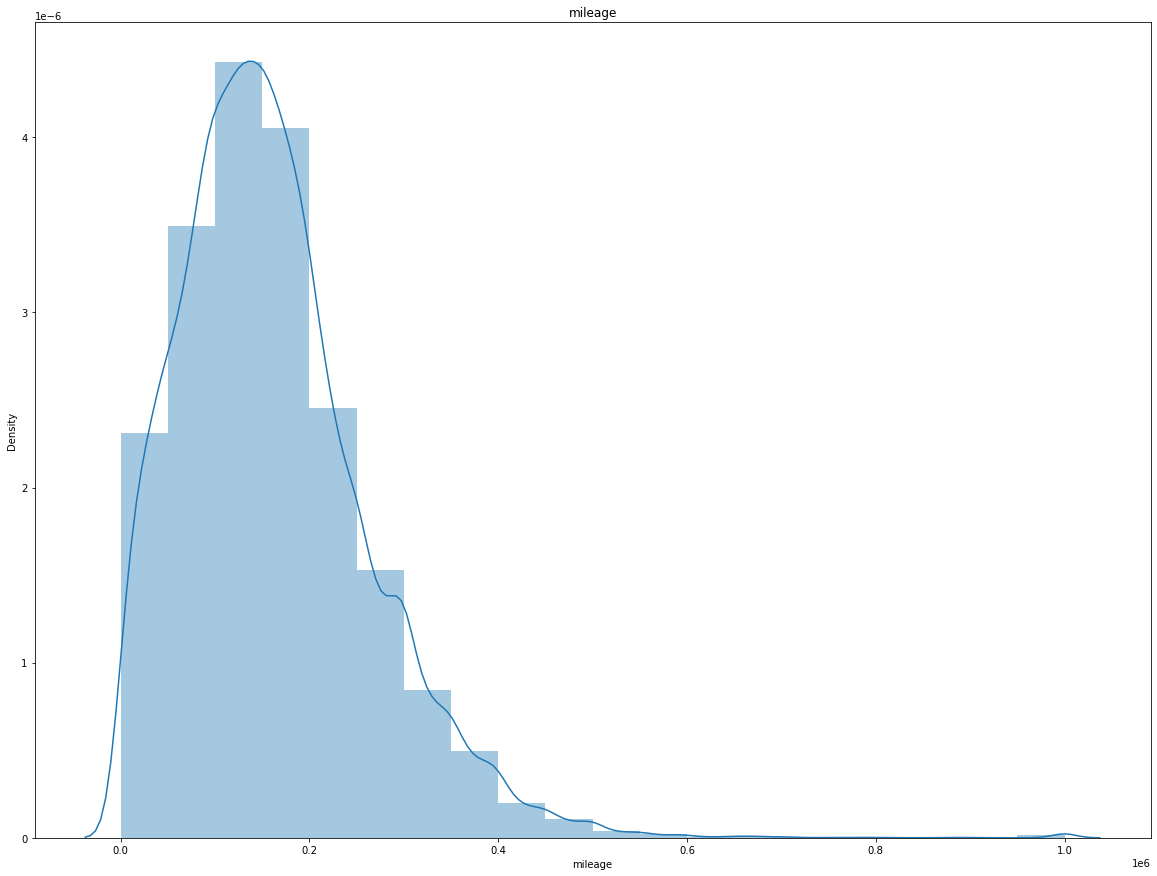

In [274]:
plt.figure()
sns.distplot(df_test['mileage'], hist=True, kde = True, rug=False, bins=20)
plt.title('mileage')
#plt.xlim(0,100000)
plt.show()

In [275]:
df_test[df_test['mileage']==0]

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


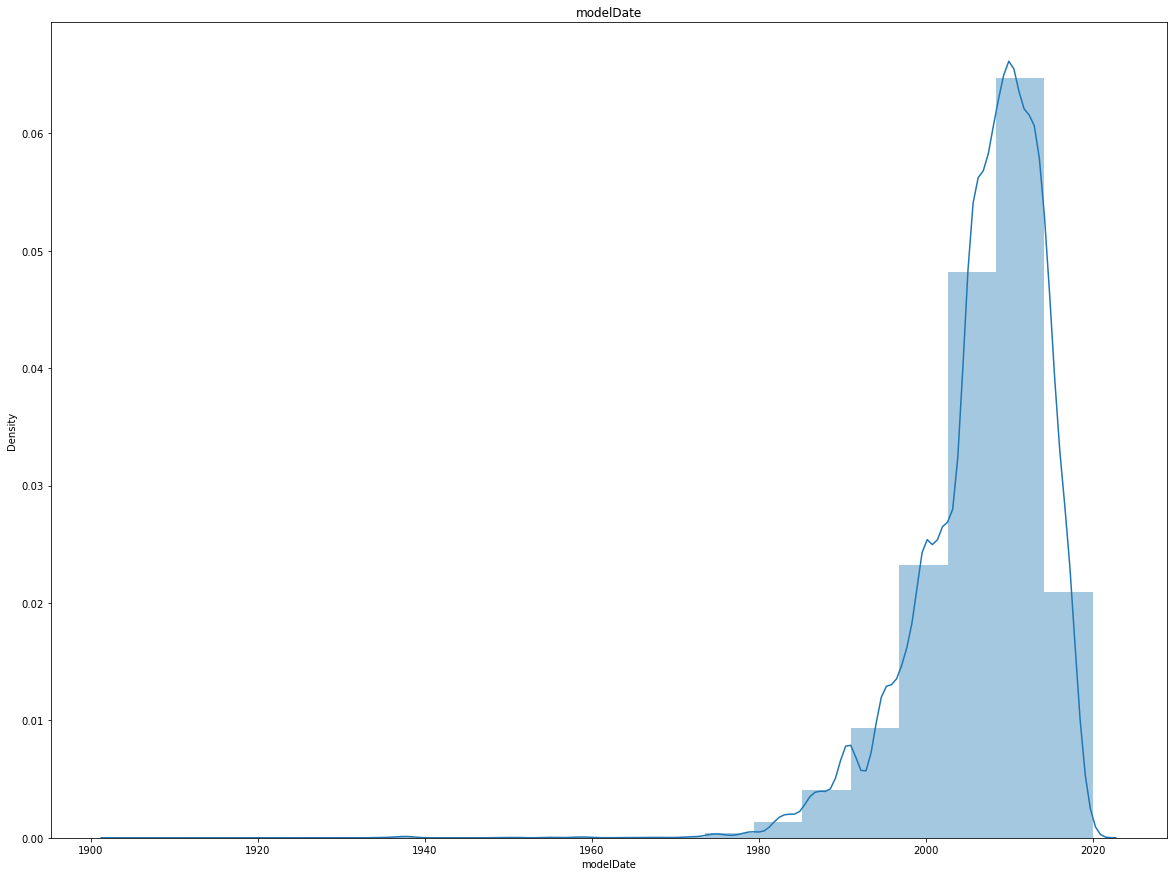

In [277]:
plt.figure()
sns.distplot(df_test['modelDate'], hist=True, kde = True, rug=False, bins=20)
plt.title('modelDate')
#plt.xlim(0,100000)
plt.show()

In [278]:
df_test[df_test['modelDate'] < 1980]['modelDate'].value_counts().sort_index(ascending=False)

1979    26
1978    10
1977     5
1976     6
1975    16
1974    11
1973     1
1972     4
1971     2
1969     1
1968     2
1966     2
1965     1
1963     1
1960     1
1959     3
1958     3
1955     3
1951     2
1949     2
1938     7
1937     3
1936     2
1934     1
1904     1
Name: modelDate, dtype: int64

In [279]:
df_test['model_info'].sample(10)

26173    {"code":"CARAVELLE","name":"Caravelle","ru_nam...
28667    {"code":"LANCER","name":"Lancer","ru_name":"Ла...
154      {"code":"OCTAVIA","name":"Octavia","ru_name":"...
12941    {"code":"PRIMERA","name":"Primera","ru_name":"...
29460    {"code":"2ER","name":"2 серии","ru_name":"2 се...
6106     {"code":"ACCORD","name":"Accord","ru_name":"Ак...
7644     {"code":"X3","name":"X3","ru_name":"Х3","morph...
3238     {"code":"RS6","name":"RS 6","ru_name":"РС6","m...
17980    {"code":"GLK_KLASSE","name":"GLK-Класс","ru_na...
31405    {"code":"S40","name":"S40","ru_name":"S40","mo...
Name: model_info, dtype: object

In [280]:
df_test['model_info'].loc[100]

'{"code":"YETI","name":"Yeti","ru_name":"Йети","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}'

In [281]:
keys_list = []
for element in df_test['model_info'].loc[16611].split(':'):
    keys_list.append(element.split(',')[-1])
keys_list

['{"code"',
 '"name"',
 '"ru_name"',
 '"morphology"',
 '"nameplate"',
 '{"code"',
 '"name"',
 '"semantic_url"',
 '"400"}}']

In [298]:
df_test['model_name'].sample(10)

395      OCTAVIA
14565       NOTE
7839        X5_M
22002      CAMRY
34396     MAXIMA
6683         V50
1440     OCTAVIA
8376         1ER
26716     TIGUAN
23670      JETTA
Name: model_name, dtype: object

In [282]:
df_test['name'].sample(10)

30618               1.6 MT (105 л.с.)
33075          3.0d AT (238 л.с.) 4WD
7927       40d 3.0d AT (313 л.с.) 4WD
21775               2.2 AT (140 л.с.)
34433               1.8 AT (116 л.с.)
16097    220 d 2.1d AT (170 л.с.) 4WD
24754               1.6 MT (105 л.с.)
10598          116i 1.6 AT (115 л.с.)
26583               2.0 MT (150 л.с.)
19580           2.7 AT (163 л.с.) 4WD
Name: name, dtype: object

In [283]:
df_test['numberOfDoors'].value_counts()

5    18703
4    14126
2     1206
3      650
0        1
Name: numberOfDoors, dtype: int64

In [284]:
df_test['parsing_date'] = df_test['parsing_unixtime'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m'))

In [285]:
df_test['parsing_date'].value_counts()

2020-10    34686
Name: parsing_date, dtype: int64

In [286]:
df_test['priceCurrency'].value_counts()

RUB    34686
Name: priceCurrency, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


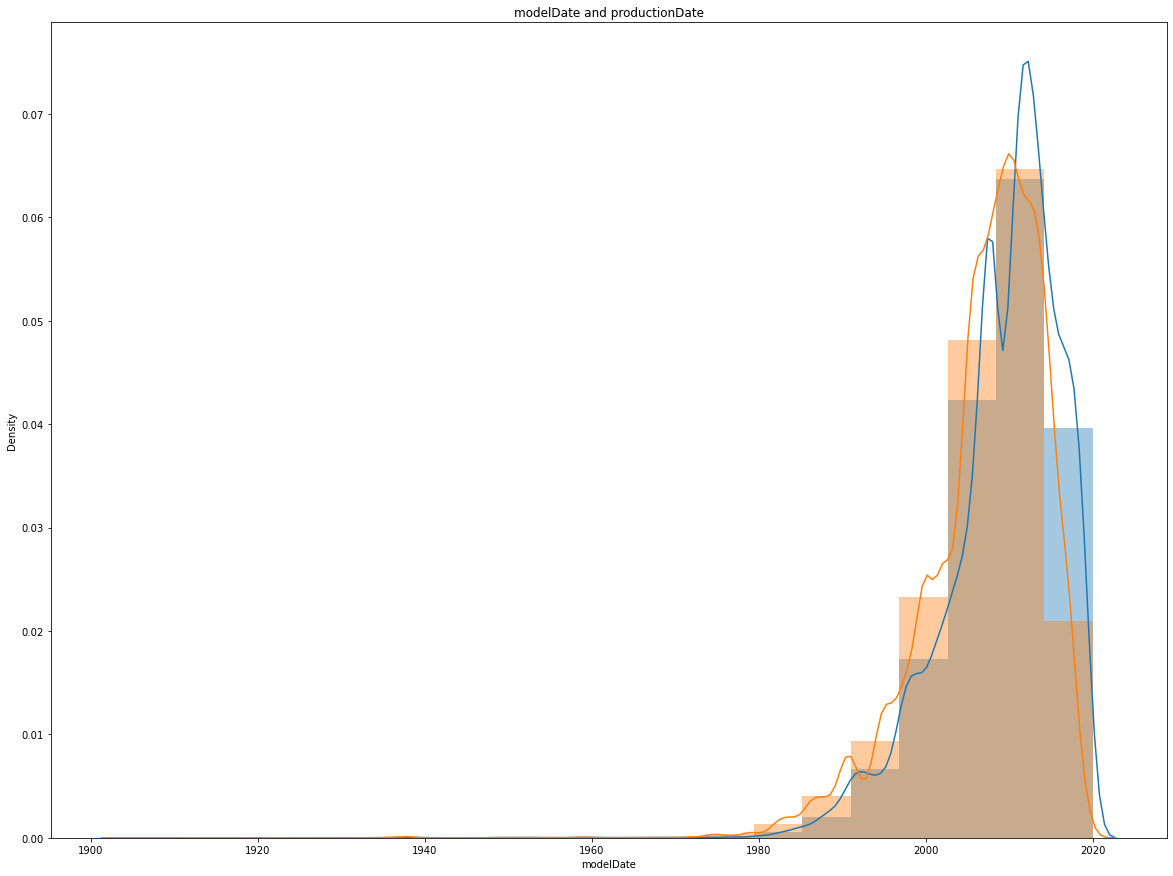

In [287]:
plt.figure()
sns.distplot(df_test['productionDate'], hist=True, kde = True, rug=False, bins=20)
sns.distplot(df_test['modelDate'], hist=True, kde = True, rug=False, bins=20)
plt.title('modelDate and productionDate')
#plt.xlim(0,100000)
plt.show()

In [289]:
# Присутствуют нексолько значений, где modelDate больше, чем productionDate
df_test['productionDate_modelDate'] = df_test['productionDate'] - df_test['modelDate']
df_test['productionDate_modelDate'].value_counts().sort_index(ascending=False)

 46       1
 35       2
 34       2
 27       1
 22       1
 18       1
 16       1
 15       6
 14       3
 13      13
 12      12
 11      33
 10      31
 9       60
 8      153
 7      237
 6      524
 5     1474
 4     3629
 3     6512
 2     8682
 1     9227
 0     4076
-1        3
-2        2
Name: productionDate_modelDate, dtype: int64

In [290]:
df_test['sell_id'].sample(10)

14613    1057904200
7039     1092288388
4098     1089121268
33696    1101366319
18891    1100474722
14891    1101056688
31872    1101326152
31648    1101354931
22457    1100856554
34010    1100954884
Name: sell_id, dtype: int64

In [291]:
df_test['super_gen'].sample(10)

21375    {"id":"20675175","displacement":2755,"engine_t...
2513     {"id":"21666861","nameplate":"35 TFSI","displa...
26208    {"id":"21601650","displacement":1896,"engine_t...
3267     {"id":"20504535","displacement":2967,"engine_t...
29118    {"id":"20807819","displacement":2351,"engine_t...
24054    {"id":"20500300","nameplate":"4MOTION","displa...
10066    {"id":"4927477","name":"3.0i","nameplate":"3.0...
15541    {"id":"20581942","name":"350","nameplate":"350...
31761    {"id":"4995301","name":"320","nameplate":"320"...
27236    {"id":"20471406","displacement":1834,"engine_t...
Name: super_gen, dtype: object

In [292]:
keys_list = []
for element in df_test['super_gen'].loc[16611].split(':'):
    keys_list.append(element.split(',')[-1])
keys_list

['{"id"',
 '"name"',
 '"nameplate"',
 '"displacement"',
 '"engine_type"',
 '"gear_type"',
 '"transmission"',
 '"power"',
 '"power_kvt"',
 '"human_name"',
 '"acceleration"',
 '"clearance_min"',
 '"fuel_rate"',
 '13}']

In [293]:
df_test['vehicleConfiguration'].sample(10)

4329      HATCHBACK_5_DOORS AUTOMATIC 1.6
21244       ALLROAD_5_DOORS AUTOMATIC 4.5
28398        ALLROAD_5_DOORS VARIATOR 2.0
32119        ALLROAD_5_DOORS VARIATOR 2.0
632                LIFTBACK AUTOMATIC 1.6
30356            PICKUP_TWO AUTOMATIC 2.0
26563    HATCHBACK_3_DOORS MECHANICAL 1.8
17781                 SEDAN AUTOMATIC 2.0
14150                  SEDAN VARIATOR 2.5
26148     HATCHBACK_5_DOORS AUTOMATIC 2.0
Name: vehicleConfiguration, dtype: object

In [294]:
df_test['vehicleTransmission'].value_counts()

автоматическая      19596
механическая         7209
вариатор             3999
роботизированная     3882
Name: vehicleTransmission, dtype: int64

In [295]:
df_test['vendor'].value_counts()

EUROPEAN    20682
JAPANESE    14004
Name: vendor, dtype: int64

In [296]:
df_test['Владельцы'].value_counts()

3 или более    15957
1 владелец      9459
2 владельца     9270
Name: Владельцы, dtype: int64

In [299]:
df_test['Владение'].sample(10)

13188      3 года и 1 месяц
2514     2 года и 7 месяцев
25795                   NaN
30405                   NaN
5146     6 лет и 10 месяцев
26741                   NaN
81                      NaN
8121      2 года и 3 месяца
21546     13 лет и 3 месяца
24380     4 года и 4 месяца
Name: Владение, dtype: object

In [300]:
df_test['ПТС'].value_counts()

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64

In [301]:
df_test['Привод'].value_counts()

передний    15565
полный      15020
задний       4101
Name: Привод, dtype: int64

In [302]:
df_test['Руль'].value_counts()

Левый     33287
Правый     1399
Name: Руль, dtype: int64

In [303]:
df_test['Состояние'].value_counts()

Не требует ремонта    34686
Name: Состояние, dtype: int64

In [304]:
df_test['Таможня'].value_counts()

Растаможен    34686
Name: Таможня, dtype: int64

### Ссумируем всю информацию о признаках в "test":

**bodyType** - вид кузова, пропусков нет

**brand** - пропусков нет

**car_url** - все значения уникальны, пропусков нет **удалить**

**color** - пропусков нет

**complectation_dict** - виды комплектации, *можно достать наличие отдельных пунктов*, всего 2364 уникальных значений, **28268** пропусков

**description** - 31732 уникальных значений, пропусков нет

**engineDisplacement** - объем двигателя, строковые значения, пропусков нет, *но есть 55 значений "LTR"*

**enginePower** - мощность двигателя, пропусков нет

**equipment_dict** - возможно есть корреляция с complectation_dict требуется обработка, **9996** пропусков

**fuelType** - 5 уникальных значений, пропусков нет

**image** - есть повторения, пропусков нет

**mileage** - количественный признак, пропусков нет

**modelDate** - год выпуска машины, 66 уникальных признаков, пропусков нет

**model_info** - представляет словарь с ключами: code, name, ru_name,morphology:{"gender"},nameplate:{"code","name","semantic_url"}, **удалить**

**model_name** - пропусков нет

**name** - объем двигателя, кол-во лошадиных сил, пропусков нет

**numberOfDoors** - пропусков нет, но есть одно значение **0**

**parsing_unixtime** - все данные собраны 2020-10, пропусков нет

**priceCurrency** - единственное уникольное значение RUB, пропусков нет

**productionDate** - 69 уникальных признаков, не совпадают с modelDate; в нескольких случаях меньше, чем modelDate; пропусков нет

**sell_id** - пропусков нет

**super_gen** - словарь с ключами: {"id":"", "displacement"(*engineDisplacement*):, "engine_type" (*fuelType*):"", "gear_type" (*привод*):"", "transmission" (*vehicleTransmission*):"", "power" (?enginePower?):, "power_kvt":, "human_name" (*name*):", "acceleration":, "clearance_min":, "fuel_rate":}, пропусков нет   

**vehicleConfiguration** - вид кузова, коробка передач, объем двигателя; пропусков нет

**vehicleTransmission** - 4 уникальных значения, пропусков нет

**vendor** - поставщик (EUROPEAN и JAPANESE), пропусков нет

**Владельцы** - 3 уникальных значения, пропусков нет

**Владение** - строковое значение, **22691** пропуск

**ПТС** - Оригинал или Дубликат, **1** пропуск

**Привод** - 3 уникальных значения, пропусков нет

**Руль** - 2 ункальных значения, пропусков нет

**Состояние** - только одно уникальное значение ("Не требует ремонта"), пропусков нет, **удалить?**

**Таможня** - только одно уникальное значение ("Растаможен"), пропусков нет, **удалить:** 

#### Данные по автомобильным маркам парсились отдельным скриптом (Data Parsing.ipynb)

In [305]:
DATA_DIR = '/kaggle/input/'
df_train = pd.read_csv(DATA_DIR+'readydatafull/train.csv')

In [306]:
df_train.sample(10)

,Unnamed: 0,car_url,prod_year,mileage,body,color,motor,transmission,gear,stir,condition,owners,PTS,customs,price
11601,876,https://auto.ru/cars/used/sale/mercedes/cla_kl...,2017,54600км,седан,синий,1.6 л / 150л.с. / Бензин,3750₽ / год,роботизированная,передний,Левый,Не требует ремонта,2владельца,Оригинал,1649000₽
6595,3021,https://auto.ru/cars/used/sale/volkswagen/polo...,2014,127176км,седан,белый,1.6 л / 105л.с. / Бензин,3308₽ / год,автоматическая,передний,Левый,Не требует ремонта,1владелец,Оригинал,569990₽
27922,2812,https://auto.ru/cars/used/sale/skoda/superb/10...,2013,170000км,лифтбек,белый,1.8 л / 152л.с. / Бензин,7600₽ / год,роботизированная,передний,Левый,Не требует ремонта,3 или более,Дубликат,699999₽
35533,526,https://auto.ru/cars/used/sale/infiniti/ex/110...,2012,112000км,внедорожник 5 дв.,пурпурный,2.5 л / 222л.с. / Бензин,14430₽ / год,автоматическая,полный,Левый,Не требует ремонта,3 или более,Оригинал,1300000₽
13361,2636,https://auto.ru/cars/used/sale/mercedes/s_klas...,2020,6924км,купе,белый,4.0 л / 612л.с. / Бензин,275400₽ / год,автоматическая,полный,Левый,Не требует ремонта,1владелец,Оригинал,13000000₽
35379,372,https://auto.ru/cars/used/sale/infiniti/fx/110...,2011,160000км,внедорожник 5 дв.,чёрный,5.0 л / 400л.с. / Бензин,60000₽ / год,автоматическая,полный,Левый,Не требует ремонта,3 или более,Дубликат,1699000₽
12564,1839,https://auto.ru/cars/used/sale/mercedes/g_klas...,2020,32км,внедорожник 5 дв.,чёрный,4.0 л / 585л.с. / Бензин,263250₽ / год,автоматическая,полный,Левый,Не требует ремонта,1владелец,Оригинал,20550000₽
21589,116,https://auto.ru/cars/used/sale/mitsubishi/outl...,2011,105171км,внедорожник 5 дв.,чёрный,2.4 л / 170л.с. / Бензин,7650₽ / год,вариатор,полный,Левый,Не требует ремонта,2владельца,Оригинал,910000₽
12574,1849,https://auto.ru/cars/used/sale/mercedes/c_klas...,2015,59670км,седан,чёрный,1.6 л / 156л.с. / Бензин,6240₽ / год,автоматическая,задний,Левый,Не требует ремонта,2владельца,Оригинал,1557000₽
3307,3308,https://auto.ru/cars/used/sale/bmw/x5/11017219...,2013,57000км,внедорожник 5 дв.,чёрный,4.4 л / 407л.с. / Бензин,61050₽ / год,автоматическая,полный,Левый,Не требует ремонта,2владельца,Оригинал,2500000₽


In [307]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    39975 non-null  int64 
 1   car_url       39975 non-null  object
 2   prod_year     39975 non-null  int64 
 3   mileage       39975 non-null  object
 4   body          39975 non-null  object
 5   color         39975 non-null  object
 6   motor         39975 non-null  object
 7   transmission  39975 non-null  object
 8   gear          39975 non-null  object
 9   stir          39975 non-null  object
 10  condition     39975 non-null  object
 11  owners        39975 non-null  object
 12  PTS           39975 non-null  object
 13  customs       39975 non-null  object
 14  price         39975 non-null  object
dtypes: int64(2), object(13)
memory usage: 4.6+ MB


In [308]:
df_train['brand'] = df_train['car_url'].apply(lambda x: x.split('/')[6])

In [309]:
df_train['brand'].value_counts()

mitsubishi    3637
audi          3629
skoda         3623
nissan        3600
honda         3599
bmw           3574
toyota        3569
volkswagen    3552
mercedes      3549
lexus         3254
volvo         2675
infiniti      1714
Name: brand, dtype: int64

In [310]:
#Для начала проверим все ли виды кузовов из "test" представлены в "train"
body_test = df_test['bodyType'].value_counts().index.to_list()
body_train = df_train['body'].value_counts().index.to_list()
missed_body = []
for name in body_test:
    if name not in body_train:
        missed_body.append(name)
missed_body = list(set(missed_body))

missed_body

['лимузин']

In [311]:
# Отсутствуют лимузины. Допарсим такие автомобили
df_test[df_test['bodyType']=='лимузин']['brand']

15962    MERCEDES
16908    MERCEDES
17061    MERCEDES
17555    MERCEDES
31727    MERCEDES
31882    MERCEDES
Name: brand, dtype: object

In [312]:
df_limousine = pd.read_csv(DATA_DIR+'limousine/mercedes_limousine.csv')

In [313]:
df_limousine['brand'] = df_limousine['car_url'].apply(lambda x: x.split('/')[6])

In [314]:
df = pd.concat([df_train, df_limousine])

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39981 entries, 0 to 5
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    39975 non-null  float64
 1   car_url       39981 non-null  object 
 2   prod_year     39981 non-null  int64  
 3   mileage       39981 non-null  object 
 4   body          39981 non-null  object 
 5   color         39981 non-null  object 
 6   motor         39981 non-null  object 
 7   transmission  39981 non-null  object 
 8   gear          39981 non-null  object 
 9   stir          39981 non-null  object 
 10  condition     39981 non-null  object 
 11  owners        39981 non-null  object 
 12  PTS           39981 non-null  object 
 13  customs       39981 non-null  object 
 14  price         39981 non-null  object 
 15  brand         39981 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.2+ MB


#### Преобразуем таблицу таким образом, чтобы можно было соединить ее с тестовой таблицей

In [316]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [317]:
df['model_name'] = df_train['car_url'].apply(lambda x: x.split('/')[7])

In [318]:
df.rename(columns={"body": "bodyType"}, inplace=True)

In [319]:
df['complectation_dict'] = df['brand'].apply(lambda x: None)

In [320]:
df['description'] = df['brand'].apply(lambda x: None)

In [321]:
df['motor'].value_counts()

1.6 л / 110л.с. / Бензин                                1260
3.0 л / 249л.с. / Дизель                                 963
2.0 л / 150л.с. / Бензин                                 948
1.4 л / 150л.с. / Бензин                                 794
1.6 л / 105л.с. / Бензин                                 762
                                                        ... 
1.5 л / 98л.с. / Бензин, газобаллонное оборудование        1
3.4 л / 170л.с. / Бензин                                   1
1.9 л / 136л.с. / Бензин, газобаллонное оборудование       1
2.8 л / 91л.с. / Дизель                                    1
1.8 л / 125л.с. / Бензин, газобаллонное оборудование       1
Name: motor, Length: 1466, dtype: int64

In [322]:
df['engineDisplacement'] = df['motor'].apply(lambda x: x[:x.find(' ')])

In [323]:
df.drop(df[df.motor == 'Не требует ремонта'].index, inplace=True)

In [324]:
df['fuelType'] = df['motor'].apply(lambda x: x.split('/')[2][1:].lower())

In [325]:
df['fuelType'].value_counts()

бензин                                32243
дизель                                 6613
гибрид                                  610
бензин, газобаллонное оборудование      419
электро                                  89
газ                                       2
дизель, газобаллонное оборудование        2
гибрид, газобаллонное оборудование        1
Name: fuelType, dtype: int64

In [326]:
df['engineDisplacement'].value_counts().head(60)

2.0        9409
1.6        5476
3.0        4099
2.5        2853
1.8        2818
2.4        2245
3.5        2128
1.4        2024
1.5        1138
1.3         591
1.2         584
4.5         471
2.8         453
5.7         438
3.7         385
4.7         313
5.6         311
4.0         305
2.3         304
2.1         297
4.4         292
4.6         289
3.2         287
2.7         261
5.5         250
2.9         238
2.2         214
5.0         154
4.2         152
3.6         151
1.9         126
1.7         124
3.3         119
0.7         103
3.8          61
4.3          53
1.0          49
2.6          41
3.1          40
109л.с.      34
6.0          31
4.1          30
6.2          29
5.4          28
4.8          28
3.4          27
5.2          18
150л.с.      18
1.1          14
170л.с.      11
6.6          10
408л.с.      10
6.3           8
5.9           8
4.9           5
184л.с.       4
115л.с.       4
3.9           4
67л.с.        3
5.8           3
Name: engineDisplacement, dtype: int64

In [327]:
# Отдельные значения не имеют "объема двигателя". Это машины с электродвигателем. 
df[df['engineDisplacement']=='170л.с.']['fuelType']

55      электро
868     электро
1032    электро
1517    электро
1810    электро
2025    электро
2633    электро
2825    электро
2910    электро
2985    электро
2998    электро
Name: fuelType, dtype: object

In [328]:
# Заменим эти значение на "None"
def engine(row):
    if row['fuelType']=='электро':
        return None
    else:
        return row['engineDisplacement']
df['engineDisplacement'] = df.apply(engine, axis=1)

In [329]:
def enginePower(row):
    if row['fuelType'] == 'электро':
        return row['motor'].split('/')[0][:-5]
    else:
        return row['motor'].split('/')[1][1:-5]
df['enginePower'] = df.apply(enginePower, axis=1)

In [330]:
df['equipment_dict'] = df['brand'].apply(lambda x: None)

In [331]:
df.drop(['motor'], axis=1,inplace=True)

In [332]:
df['image'] = df['brand'].apply(lambda x: None)

In [333]:
df['mileage'] = df['mileage'].apply(lambda x: int(x[:-2]))

In [334]:
df['modelDate'] = df['prod_year'].apply(lambda x: None)

In [335]:
df['model_info'] = df['brand'].apply(lambda x: None)

In [336]:
df['numberOfDoors'] = df['brand'].apply(lambda x: None)
df['parsing_unixtime'] = df['brand'].apply(lambda x: None)
df['priceCurrency'] = df['brand'].apply(lambda x: 'RUB')

In [337]:
df.rename(columns={'prod_year': 'productionDate'}, inplace=True)

In [338]:
df['sell_id'] = df['car_url'].apply(lambda x: x.split('/')[8][:10])

In [340]:
df['super_gen'] = df['brand'].apply(lambda x: None)

In [341]:
df['vehicleConfiguration'] = df['brand'].apply(lambda x: None)

In [342]:
def transmission(row):
    if row['gear'] in ['автоматическая', 'роботизированная', 'вариатор', 'механическая']:
        return row['gear']
    if row['stir'] in ['автоматическая', 'роботизированная', 'вариатор', 'механическая']:
        return row['stir']
    else:
        return None

df['vehicleTransmission'] = df.apply(transmission, axis=1)
    

In [343]:
df['vehicleTransmission'].value_counts()

автоматическая      22028
механическая         7065
вариатор             5165
роботизированная     4780
Name: vehicleTransmission, dtype: int64

In [344]:
df.drop('transmission', axis=1, inplace=True)

In [477]:
vendor_JAPANESE = []
for i in range(len(df_test)):
    if df_test.loc[i]['vendor'] == 'JAPANESE':
        if df_test.loc[i]['brand'] not in vendor_JAPANESE:
            vendor_JAPANESE.append(df_test.loc[i]['brand'].lower())
vendor_JAPANESE = list(set(vendor_JAPANESE))

In [478]:
def vendor(row):
    if row['brand'] in vendor_JAPANESE:
        return 'JAPANESE'
    return 'EUROPEAN'
df['vendor'] = df.apply(vendor, axis=1)

In [479]:
df['vendor'].value_counts()

EUROPEAN    20608
JAPANESE    19371
Name: vendor, dtype: int64

In [347]:
def owners(row):
    if row['owners'] in ['3 или более','1владелец', '2владельца']:
        return row['owners']
    if row['PTS'] in ['3 или более','1владелец', '2владельца']:
        return row['PTS']
    if row['customs'] in ['3 или более','1владелец', '2владельца']:
        return row['customs']
    else:
        return 'NAN'
    
df['Владельцы'] = df.apply(owners, axis=1)

In [348]:
df['Владение'] = df['brand'].apply(lambda x: None)

In [349]:
def PTS(row):
    if row['PTS'] in ['Оригинал', 'Дубликат']:
        return row['PTS']
    if row['customs'] in ['Оригинал', 'Дубликат']:
        return row['customs']
    else:
        return None
    
df['ПТС'] = df.apply(PTS, axis=1)

In [350]:
def gear(row):
    if row['vehicleTransmission'] in ['полный', 'передний', 'задний']:
        return row['vehicleTransmission']
    if row['stir'] in ['полный', 'передний', 'задний']:
        return row['stir']
    if row['condition'] in ['полный', 'передний', 'задний']:
        return row['condition']
    else:
        return None
 
df['Привод'] = df.apply(gear, axis=1)

In [351]:
def stir(row):
    if row['condition'] in ['Левый','Правый']:
        return row['condition']
    if row['stir'] in ['Левый','Правый']:
        return row['stir']
    if row['owners'] in ['Левый','Правый']:
        return row['owners']
    else:
        return None
    
df['Руль'] = df.apply(stir, axis=1)

In [352]:
df['Состояние'] = df['brand'].apply(lambda x: 'Не требует ремонта')
df['Таможня'] = df['brand'].apply(lambda x: 'Растаможен')

In [353]:
df['price'] = df['price'].apply(lambda x: int(x[:-1]))

In [354]:
df.drop(['gear', 'stir', 'condition', 'owners', 'PTS', 'customs'], axis=1, inplace=True)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39979 entries, 0 to 5
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car_url               39979 non-null  object
 1   productionDate        39979 non-null  int64 
 2   mileage               39979 non-null  int64 
 3   bodyType              39979 non-null  object
 4   color                 39979 non-null  object
 5   price                 39979 non-null  int64 
 6   brand                 39979 non-null  object
 7   model_name            39979 non-null  object
 8   complectation_dict    0 non-null      object
 9   description           0 non-null      object
 10  engineDisplacement    39890 non-null  object
 11  fuelType              39979 non-null  object
 12  enginePower           39979 non-null  object
 13  equipment_dict        0 non-null      object
 14  image                 0 non-null      object
 15  modelDate             0 non-null      ob

## Обрабртка признаков

In [356]:
df['sample'] = 1 # помечаем трейн
df_test['sample'] = 0 # помечаем тест
df_test['price'] = 0 # в тесте нет значения default, его нужно предсказать, по этому пока заполняем нулями

data = df_test.append(df, sort=False).reset_index(drop=True) # объединяем тест и трейн

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74665 entries, 0 to 74664
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bodyType                  74665 non-null  object 
 1   brand                     74665 non-null  object 
 2   car_url                   74665 non-null  object 
 3   color                     74665 non-null  object 
 4   complectation_dict        6418 non-null   object 
 5   description               34686 non-null  object 
 6   engineDisplacement        74576 non-null  object 
 7   enginePower               74665 non-null  object 
 8   equipment_dict            24690 non-null  object 
 9   fuelType                  74665 non-null  object 
 10  image                     34686 non-null  object 
 11  mileage                   74665 non-null  int64  
 12  modelDate                 34686 non-null  object 
 13  model_info                34686 non-null  object 
 14  model_

In [358]:
data['bodyType'].value_counts()

внедорожник 5 дв.          29096
седан                      26345
лифтбек                     5089
хэтчбек 5 дв.               4374
универсал 5 дв.             2552
минивэн                     1840
купе                        1711
компактвэн                  1075
хэтчбек 3 дв.                811
пикап двойная кабина         655
внедорожник 3 дв.            311
купе-хардтоп                 232
кабриолет                    165
фургон                       155
родстер                      150
микровэн                      33
седан-хардтоп                 19
седан 2 дв.                   12
лимузин                       12
пикап одинарная кабина        11
пикап полуторная кабина        6
внедорожник открытый           4
тарга                          3
универсал 3 дв.                2
фастбек                        2
Name: bodyType, dtype: int64

In [359]:
data['brand'] = data['brand'].apply(lambda x: x.lower())

In [360]:
data['brand'].value_counts()

bmw           8047
nissan        7993
volkswagen    7956
mercedes      7735
toyota        7482
audi          7050
mitsubishi    6480
skoda         6364
honda         4747
volvo         4138
lexus         4088
infiniti      2585
Name: brand, dtype: int64

In [361]:
# Для сохранения пследовательности, извлечем model_name из car_url для всех данных
data['model_name'] = data['car_url'].apply(lambda x: x.split('/')[7])

In [362]:
drop_list = ['car_url', 'complectation_dict', 'description', 'equipment_dict', 'image', 'model_info', 'name', 'parsing_unixtime', 'priceCurrency', 'modelDate',
             'sell_id', 'super_gen', 'vehicleConfiguration', 'Владение', 'Состояние', 'Таможня', 'parsing_date', 'productionDate_modelDate' ]

In [363]:
data.drop(drop_list, axis=1, inplace=True)

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74665 entries, 0 to 74664
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             74665 non-null  object
 1   brand                74665 non-null  object
 2   color                74665 non-null  object
 3   engineDisplacement   74576 non-null  object
 4   enginePower          74665 non-null  object
 5   fuelType             74665 non-null  object
 6   mileage              74665 non-null  int64 
 7   model_name           74665 non-null  object
 8   numberOfDoors        34686 non-null  object
 9   productionDate       74665 non-null  int64 
 10  vehicleTransmission  73724 non-null  object
 11  vendor               74665 non-null  object
 12  Владельцы            74665 non-null  object
 13  ПТС                  74584 non-null  object
 14  Привод               73724 non-null  object
 15  Руль                 74665 non-null  object
 16  samp

In [365]:
data[data['sample']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             34686 non-null  object
 1   brand                34686 non-null  object
 2   color                34686 non-null  object
 3   engineDisplacement   34686 non-null  object
 4   enginePower          34686 non-null  object
 5   fuelType             34686 non-null  object
 6   mileage              34686 non-null  int64 
 7   model_name           34686 non-null  object
 8   numberOfDoors        34686 non-null  object
 9   productionDate       34686 non-null  int64 
 10  vehicleTransmission  34686 non-null  object
 11  vendor               34686 non-null  object
 12  Владельцы            34686 non-null  object
 13  ПТС                  34685 non-null  object
 14  Привод               34686 non-null  object
 15  Руль                 34686 non-null  object
 16  samp

In [368]:
data[[ 'color', 'sample',]].value_counts().sort_index()

color        sample
бежевый      0           639
             1           637
белый        0          6133
             1          8930
голубой      0           457
             1           408
жёлтый       0           194
             1           135
зелёный      0           952
             1           811
золотистый   0           266
             1           263
коричневый   0          1501
             1          1852
красный      0          1531
             1          1695
оранжевый    0           131
             1           159
пурпурный    0           254
             1           244
розовый      0            13
             1             8
серебристый  0          4113
             1          4011
серый        0          3984
             1          5187
синий        0          3289
             1          3476
фиолетовый   0           219
             1           197
чёрный       0         11010
             1         11966
dtype: int64

In [369]:
data['engineDisplacement'].value_counts()

2.0        9409
2.0 LTR    7391
1.6        5476
1.6 LTR    4973
3.0        4099
           ... 
3.9           4
5.8           3
5.3 LTR       1
3.9 LTR       1
0.6           1
Name: engineDisplacement, Length: 109, dtype: int64

In [370]:
data['engineDisplacement'] = data['engineDisplacement'].apply(lambda x: None if x==None or x==' LTR' else x)

In [372]:
data['engineDisplacement'] = data['engineDisplacement'].apply(lambda x: None if x==None else str(x[:3]))

In [373]:
data['engineDisplacement'].value_counts().sort_index()

0.6        1
0.7      156
1.0      106
1.1       18
1.2     1069
1.3      956
1.4     3659
1.5     1863
1.6    10449
1.7      183
1.8     6167
1.9      347
2.0    16800
2.1      568
2.2      450
2.3      507
2.4     3990
2.5     5330
2.6       96
2.7      450
2.8      837
2.9      369
3.0     8014
3.1      128
3.2      635
3.3      163
3.4       63
3.5     3838
3.6      334
3.7      627
3.8      118
3.9        5
4.0      661
4.1       65
4.2      380
4.3       85
4.4      739
4.5      817
4.6      397
4.7      690
4.8      112
4.9        9
5.0      312
5.2       30
5.3        1
5.4       59
5.5      611
5.6      481
5.7      573
5.8       10
5.9       20
6.0       84
6.2       57
6.3       16
6.6       16
Name: engineDisplacement, dtype: int64

In [374]:
# Там, где объем двигателя 'None' - электродвигатель
data[data['engineDisplacement'].isna()]['fuelType'].value_counts()

электро    144
Name: fuelType, dtype: int64

In [375]:
data['enginePower'] = data['enginePower'].apply(lambda x: x[:3])

In [376]:
data['enginePower'] = pd.to_numeric(data['enginePower'], downcast='integer')

In [377]:
data['enginePower'].value_counts().sort_index(ascending=False)

639    14
630     2
626     2
625    38
612    71
       ..
40      1
38      1
32      1
30      1
19      1
Name: enginePower, Length: 340, dtype: int64

In [378]:
data['fuelType'].value_counts()

бензин                                60844
дизель                                12413
гибрид                                  833
бензин, газобаллонное оборудование      419
электро                                 144
газ                                       9
дизель, газобаллонное оборудование        2
гибрид, газобаллонное оборудование        1
Name: fuelType, dtype: int64

In [379]:
def fuelType(row):
    if row['fuelType'] in ['бензин, газобаллонное оборудование', 'гибрид, газобаллонное оборудование', 'дизель, газобаллонное оборудование', 'газ, газобаллонное оборудование']:
        return 'гибрид'
    else:
        return row['fuelType']
    
data['fuelType'] = data.apply(fuelType, axis=1)

In [380]:
data['mileage'] = pd.to_numeric(data['mileage'], downcast='integer')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


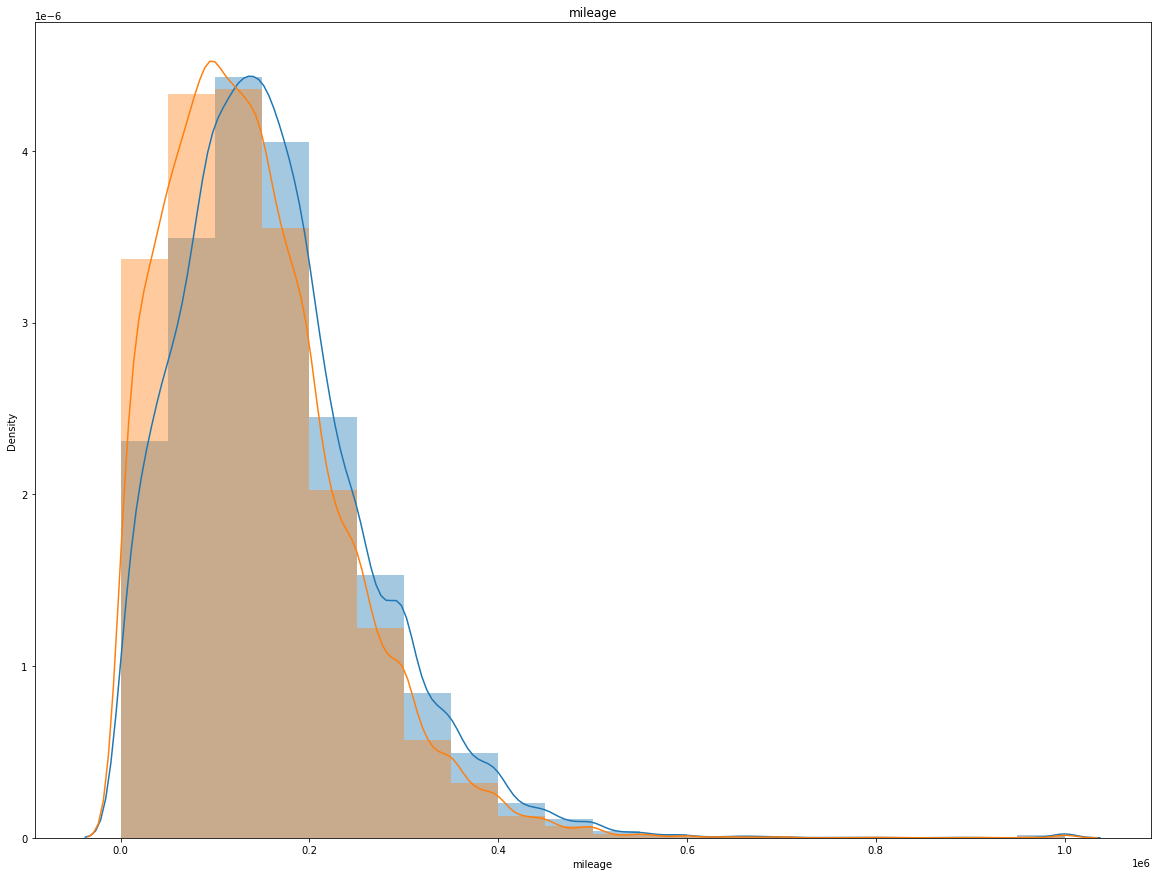

In [381]:
plt.figure()
sns.distplot(data[data['sample']==0]['mileage'], hist=True, kde = True, rug=False, bins=20)
sns.distplot(data[data['sample']==1]['mileage'],  hist=True, kde = True, rug=False, bins=20)
plt.title('mileage')
#plt.xlim(0,100000)
plt.show()

In [382]:
data['model_name'].value_counts()

octavia           2882
polo              1697
5er               1671
lancer            1583
camry             1429
                  ... 
galant_fortis        1
paseo                1
verso_s              1
routan               1
clk_klasse_amg       1
Name: model_name, Length: 622, dtype: int64

In [383]:
data['productionDate'] = pd.to_numeric(data['productionDate'], downcast='integer')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


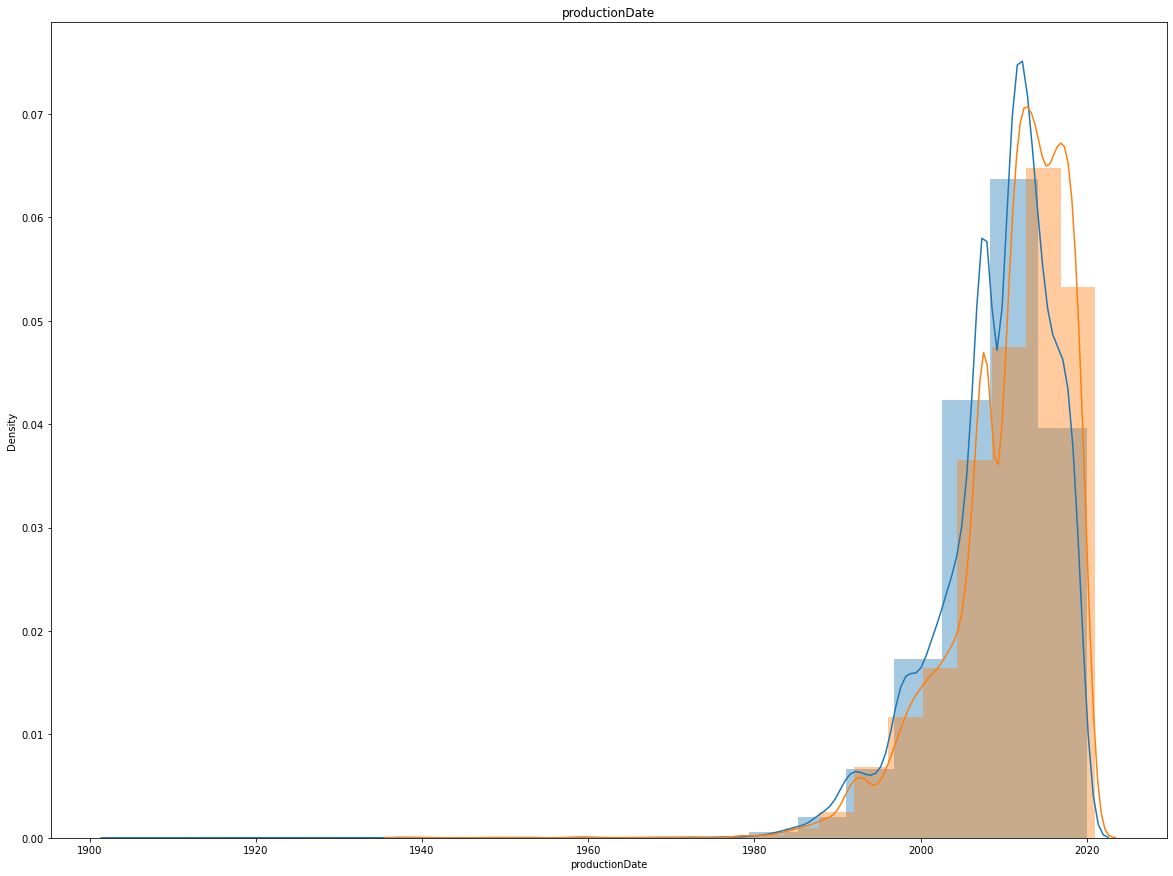

In [384]:
plt.figure()
sns.distplot(data[data['sample']==0]['productionDate'], hist=True, kde = True, rug=False, bins=20)
sns.distplot(data[data['sample']==1]['productionDate'],  hist=True, kde = True, rug=False, bins=20)
plt.title('productionDate')
#plt.xlim(0,100000)
plt.show()

In [ ]:
#data.drop(data[data['productionDate']==2021].index, inplace=True)

In [385]:
data['vehicleTransmission'].value_counts()

автоматическая      41624
механическая        14274
вариатор             9164
роботизированная     8662
Name: vehicleTransmission, dtype: int64

In [386]:
data[data['sample']==1]['vehicleTransmission'].isna().value_counts()

False    39038
True       941
Name: vehicleTransmission, dtype: int64

In [387]:
# Заполним "vehicleTransmission" наиболее частым значением
data['vehicleTransmission'] = data['vehicleTransmission'].apply(lambda x: 'автоматическая' if x==None else x)

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74665 entries, 0 to 74664
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             74665 non-null  object
 1   brand                74665 non-null  object
 2   color                74665 non-null  object
 3   engineDisplacement   74521 non-null  object
 4   enginePower          74665 non-null  int16 
 5   fuelType             74665 non-null  object
 6   mileage              74665 non-null  int32 
 7   model_name           74665 non-null  object
 8   numberOfDoors        34686 non-null  object
 9   productionDate       74665 non-null  int16 
 10  vehicleTransmission  74665 non-null  object
 11  vendor               74665 non-null  object
 12  Владельцы            74665 non-null  object
 13  ПТС                  74584 non-null  object
 14  Привод               73724 non-null  object
 15  Руль                 74665 non-null  object
 16  samp

In [389]:
data['ПТС'].value_counts()

Оригинал    64506
Дубликат    10078
Name: ПТС, dtype: int64

In [390]:
data[data['ПТС'].isna()][['ПТС', 'sample']]

,ПТС,sample
10412,NaN,0
34741,NaN,1
35153,NaN,1
35554,NaN,1
35718,NaN,1
...,...,...
54336,None,1
54650,None,1
57078,None,1
58423,None,1


In [391]:
def isna(row):
    if row['ПТС'] in ['Дубликат', 'Оригинал']:
        return row['ПТС']
    else:
        return 'Дубликат'
data['ПТС'] = data.apply(isna, axis=1)

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74665 entries, 0 to 74664
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             74665 non-null  object
 1   brand                74665 non-null  object
 2   color                74665 non-null  object
 3   engineDisplacement   74521 non-null  object
 4   enginePower          74665 non-null  int16 
 5   fuelType             74665 non-null  object
 6   mileage              74665 non-null  int32 
 7   model_name           74665 non-null  object
 8   numberOfDoors        34686 non-null  object
 9   productionDate       74665 non-null  int16 
 10  vehicleTransmission  74665 non-null  object
 11  vendor               74665 non-null  object
 12  Владельцы            74665 non-null  object
 13  ПТС                  74665 non-null  object
 14  Привод               73724 non-null  object
 15  Руль                 74665 non-null  object
 16  samp

In [482]:
data['vendor'].value_counts()

EUROPEAN    41289
JAPANESE    33375
Name: vendor, dtype: int64

In [394]:
data['Владельцы'] = data['Владельцы'].apply(lambda x: x[0])

In [395]:
data['Владельцы'].value_counts()

3    33137
1    22708
2    18819
N        1
Name: Владельцы, dtype: int64

In [396]:
data[data['Владельцы']=='N']['sample']

68148    1
Name: sample, dtype: int64

In [399]:
data['Владельцы'] = data['Владельцы'].apply(lambda x: 3 if x=='N' else x)

In [400]:
data['Владельцы'] = pd.to_numeric(data['Владельцы'], downcast='integer')

In [401]:
data['Привод'].value_counts()

полный      33526
передний    32835
задний       7363
Name: Привод, dtype: int64

In [404]:
data['Привод'].isna().value_counts()

False    73724
True       941
Name: Привод, dtype: int64

In [405]:
# Заполним значения наиболее частым значением
data['Привод'] = data['Привод'].apply(lambda x: 'полный' if x==None else x)

In [402]:
data['Руль'].value_counts()

Левый     70389
Правый     4276
Name: Руль, dtype: int64

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74665 entries, 0 to 74664
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             74665 non-null  object
 1   brand                74665 non-null  object
 2   color                74665 non-null  object
 3   engineDisplacement   74521 non-null  object
 4   enginePower          74665 non-null  int16 
 5   fuelType             74665 non-null  object
 6   mileage              74665 non-null  int32 
 7   model_name           74665 non-null  object
 8   numberOfDoors        34686 non-null  object
 9   productionDate       74665 non-null  int16 
 10  vehicleTransmission  74665 non-null  object
 11  vendor               74665 non-null  object
 12  Владельцы            74665 non-null  int8  
 13  ПТС                  74665 non-null  object
 14  Привод               74665 non-null  object
 15  Руль                 74665 non-null  object
 16  samp

In [407]:
df_test[['bodyType', 'numberOfDoors']].value_counts().sort_index()

bodyType                 numberOfDoors
внедорожник 3 дв.        3                  115
внедорожник 5 дв.        5                12228
внедорожник открытый     2                    1
                         3                    2
кабриолет                0                    1
                         2                   89
компактвэн               3                    9
                         4                  100
                         5                  380
купе                     2                  824
купе-хардтоп             2                  158
лимузин                  4                    6
лифтбек                  5                 2232
микровэн                 5                    7
минивэн                  3                   11
                         4                  528
                         5                  456
пикап двойная кабина     4                  280
пикап одинарная кабина   2                    5
пикап полуторная кабина  2                    4
 

In [408]:
# Исправим нулевое значение
def numDoors(row):
    if row['sample'] == 0:
        if row['bodyType'] == 'кабриолет':
            return 2
    return row['numberOfDoors']
    
data['numberOfDoors'] = data.apply(numDoors, axis=1)

In [409]:
numDoors = pd.pivot_table(df_test, values=['numberOfDoors'], index='bodyType', aggfunc='max')
numDoors = pd.DataFrame(numDoors.to_records())
numDoors

,bodyType,numberOfDoors
0,внедорожник 3 дв.,3
1,внедорожник 5 дв.,5
2,внедорожник открытый,3
3,кабриолет,2
4,компактвэн,5
5,купе,2
6,купе-хардтоп,2
7,лимузин,4
8,лифтбек,5
9,микровэн,5


In [410]:
# Создадим списки кузовов по количеству дверей
twoD = []
threeD = []
fourD = []
fiveD = []
for i in range(len(numDoors)):
    if numDoors.loc[i]['numberOfDoors'] == 2:
        twoD.append(numDoors.loc[i]['bodyType'])
    elif numDoors.loc[i]['numberOfDoors'] == 3:
        threeD.append(numDoors.loc[i]['bodyType'])
    elif numDoors.loc[i]['numberOfDoors'] == 4:
        fourD.append(numDoors.loc[i]['bodyType'])
    else:
        fiveD.append(numDoors.loc[i]['bodyType'])

In [411]:
# Заполним пустые значения в соответствии с ранее полученными списками
def numD(row):
    if row['sample'] == 1:
        if row['bodyType'] in twoD:
            return 2
        elif row['bodyType'] in threeD:
            return 3
        elif row['bodyType'] in fourD:
            return 4
        elif row['bodyType'] in fiveD:
            return 5
        else:
            return row['numberOfDoors']
    return row['numberOfDoors']

data['numberOfDoors'] = data.apply(numD, axis=1)
     

In [412]:
data[['bodyType','sample', 'numberOfDoors']].value_counts().sort_index()

bodyType                 sample  numberOfDoors
внедорожник 3 дв.        0       3.0                115
                         1       3.0                196
внедорожник 5 дв.        0       5.0              12228
                         1       5.0              16868
внедорожник открытый     0       2.0                  1
                                 3.0                  2
                         1       3.0                  1
кабриолет                0       2.0                 90
                         1       2.0                 75
компактвэн               0       3.0                  9
                                 4.0                100
                                 5.0                380
                         1       5.0                586
купе                     0       2.0                824
                         1       2.0                887
купе-хардтоп             0       2.0                158
                         1       2.0                 74
л

In [415]:
data['numberOfDoors'].isna().value_counts()

False    74663
True         2
Name: numberOfDoors, dtype: int64

In [421]:
data[data['numberOfDoors'].isna()][['bodyType', 'numberOfDoors']]

,bodyType,numberOfDoors
63105,универсал 3 дв.,NaN
63202,универсал 3 дв.,NaN


In [425]:
def numD_3(row):
    if row['bodyType'] == 'универсал 3 дв.':
        return 3
    return row['numberOfDoors']
data['numberOfDoors'] = data.apply(numD_3, axis=1)

In [427]:
data['numberOfDoors'] = pd.to_numeric(data['numberOfDoors'], downcast='integer')

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74665 entries, 0 to 74664
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             74665 non-null  object
 1   brand                74665 non-null  object
 2   color                74665 non-null  object
 3   engineDisplacement   74521 non-null  object
 4   enginePower          74665 non-null  int16 
 5   fuelType             74665 non-null  object
 6   mileage              74665 non-null  int32 
 7   model_name           74665 non-null  object
 8   numberOfDoors        74665 non-null  int8  
 9   productionDate       74665 non-null  int16 
 10  vehicleTransmission  74665 non-null  object
 11  vendor               74665 non-null  object
 12  Владельцы            74665 non-null  int8  
 13  ПТС                  74665 non-null  object
 14  Привод               74665 non-null  object
 15  Руль                 74665 non-null  object
 16  samp

In [429]:
data[data['sample']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             34686 non-null  object
 1   brand                34686 non-null  object
 2   color                34686 non-null  object
 3   engineDisplacement   34631 non-null  object
 4   enginePower          34686 non-null  int16 
 5   fuelType             34686 non-null  object
 6   mileage              34686 non-null  int32 
 7   model_name           34686 non-null  object
 8   numberOfDoors        34686 non-null  int8  
 9   productionDate       34686 non-null  int16 
 10  vehicleTransmission  34686 non-null  object
 11  vendor               34686 non-null  object
 12  Владельцы            34686 non-null  int8  
 13  ПТС                  34686 non-null  object
 14  Привод               34686 non-null  object
 15  Руль                 34686 non-null  object
 16  samp

In [430]:
data.reset_index(drop=True, inplace=True)

In [431]:
models_test = data[data['sample']==0]['model_name'].value_counts().index.to_list()
models_train = data[data['sample']==1]['model_name'].value_counts().index.to_list()

len(models_train)

574

In [432]:
len(models_test)

544

In [436]:
# Посмотрим, сколько моделей из "test" не представлены в "train"
not_represented = []
for model in models_test:
    if model not in models_train:
        not_represented.append(model)
not_rep_list = list(set(not_represented))
len(not_rep_list)

48

In [437]:
data[data['sample']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39979 entries, 34686 to 74664
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             39979 non-null  object
 1   brand                39979 non-null  object
 2   color                39979 non-null  object
 3   engineDisplacement   39890 non-null  object
 4   enginePower          39979 non-null  int16 
 5   fuelType             39979 non-null  object
 6   mileage              39979 non-null  int32 
 7   model_name           39979 non-null  object
 8   numberOfDoors        39979 non-null  int8  
 9   productionDate       39979 non-null  int16 
 10  vehicleTransmission  39979 non-null  object
 11  vendor               39979 non-null  object
 12  Владельцы            39979 non-null  int8  
 13  ПТС                  39979 non-null  object
 14  Привод               39979 non-null  object
 15  Руль                 39979 non-null  object
 16  

In [438]:
data[data['sample']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bodyType             34686 non-null  object
 1   brand                34686 non-null  object
 2   color                34686 non-null  object
 3   engineDisplacement   34631 non-null  object
 4   enginePower          34686 non-null  int16 
 5   fuelType             34686 non-null  object
 6   mileage              34686 non-null  int32 
 7   model_name           34686 non-null  object
 8   numberOfDoors        34686 non-null  int8  
 9   productionDate       34686 non-null  int16 
 10  vehicleTransmission  34686 non-null  object
 11  vendor               34686 non-null  object
 12  Владельцы            34686 non-null  int8  
 13  ПТС                  34686 non-null  object
 14  Привод               34686 non-null  object
 15  Руль                 34686 non-null  object
 16  samp

### Посмотрим на распределение цены

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


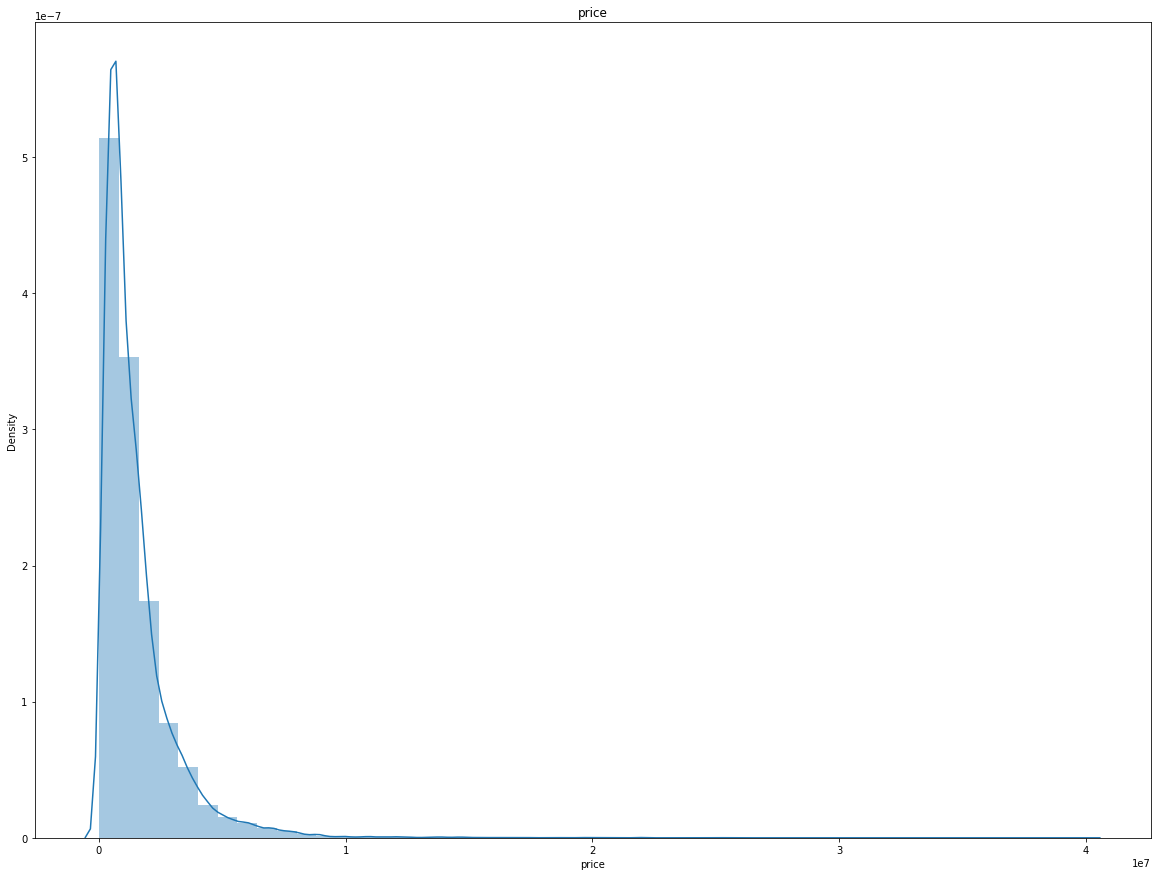

In [442]:
plt.figure()
sns.distplot(data[data['sample']==1]['price'], hist=True, kde = True, rug=False, bins=50)
plt.title('price')
#plt.xlim(0,100000)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


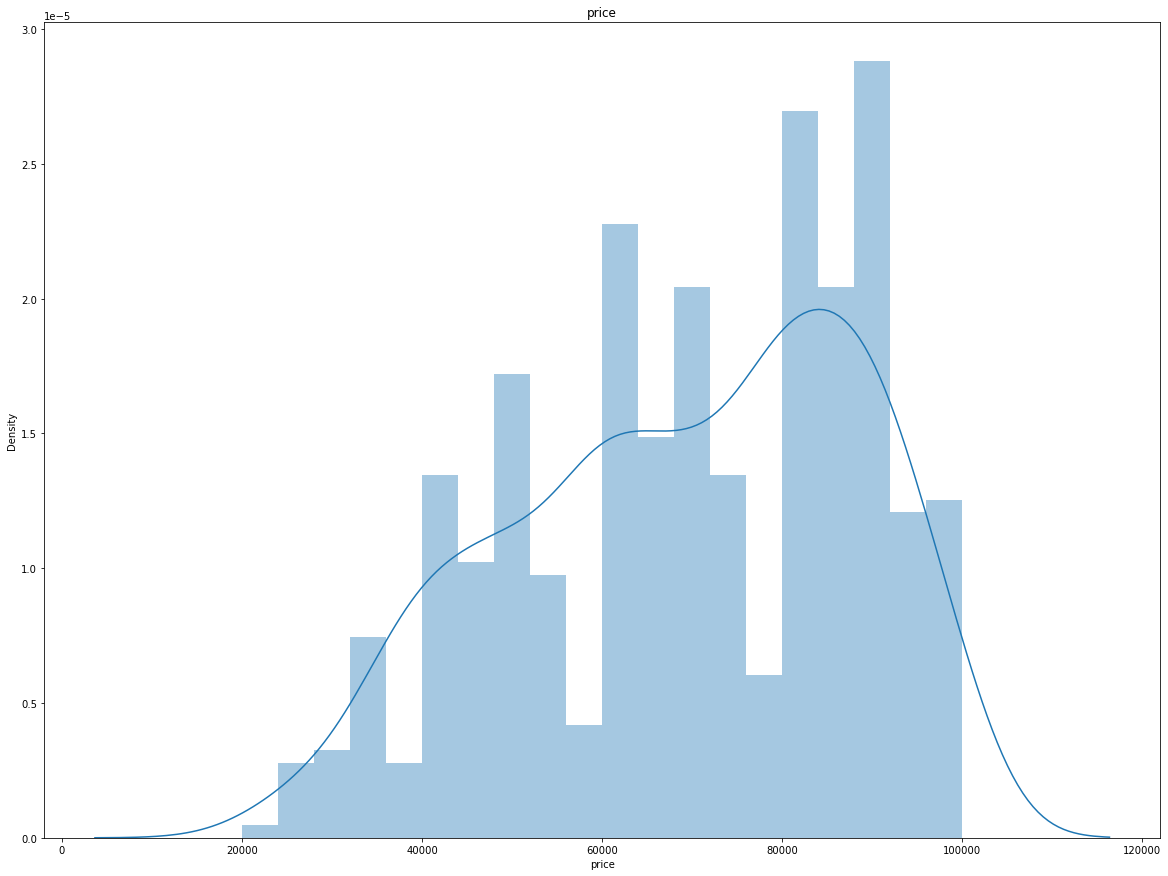

In [439]:
plt.figure()
sns.distplot(data[(data['sample']==1) & (data['price']<100000)]['price'], hist=True, kde = True, rug=False, bins=20)
plt.title('price')
#plt.xlim(0,100000)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


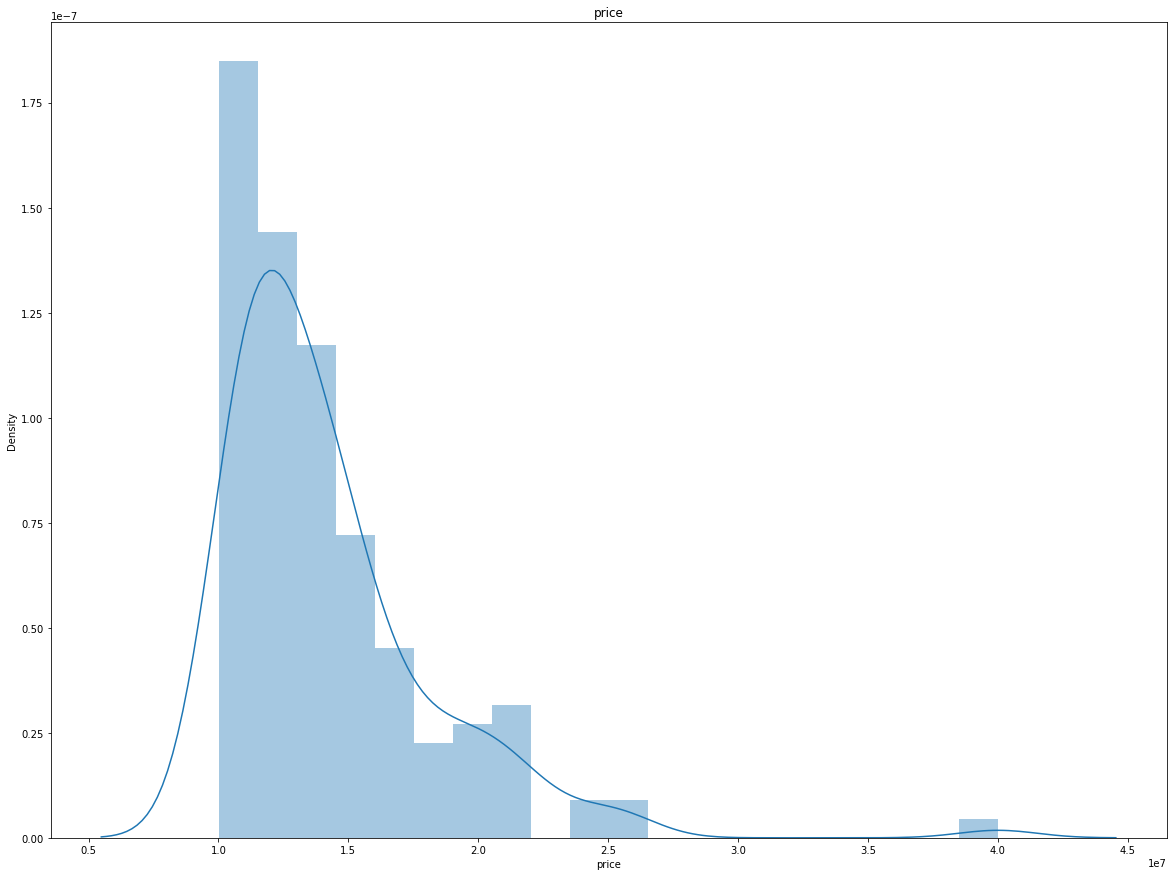

In [440]:
plt.figure()
sns.distplot(data[(data['sample']==1) & (data['price']>10000000)]['price'], hist=True, kde = True, rug=False, bins=20)
plt.title('price')
#plt.xlim(0,100000)
plt.show()

In [445]:
data[data['price']>22000000]

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,model_name,numberOfDoors,productionDate,vehicleTransmission,vendor,Владельцы,ПТС,Привод,Руль,sample,price
45771,минивэн,mercedes,чёрный,2.1,190,дизель,1,v_klasse,5,2020,автоматическая,EUROPEAN,1,Оригинал,полный,Левый,1,25300000
47210,внедорожник 5 дв.,mercedes,синий,4.0,585,бензин,3000,g_klasse_amg,5,2020,автоматическая,EUROPEAN,1,Оригинал,полный,Левый,1,25000000
48423,внедорожник 5 дв.,mercedes,чёрный,4.0,585,бензин,25000,g_klasse_amg,5,2019,автоматическая,EUROPEAN,1,Оригинал,полный,Левый,1,25800000
48441,внедорожник 5 дв.,mercedes,чёрный,5.5,544,бензин,13200,g_klasse_amg,5,2014,автоматическая,EUROPEAN,2,Оригинал,полный,Левый,1,40000000
48463,купе,mercedes,серый,5.4,626,бензин,15000,slr_klasse,2,2004,автоматическая,EUROPEAN,3,Дубликат,задний,Левый,1,23900000


In [447]:
# Удалим строку с слишком большим значением (по субъективному мнению)
data.drop(data[data['price'] == 40000000].index, inplace=True)

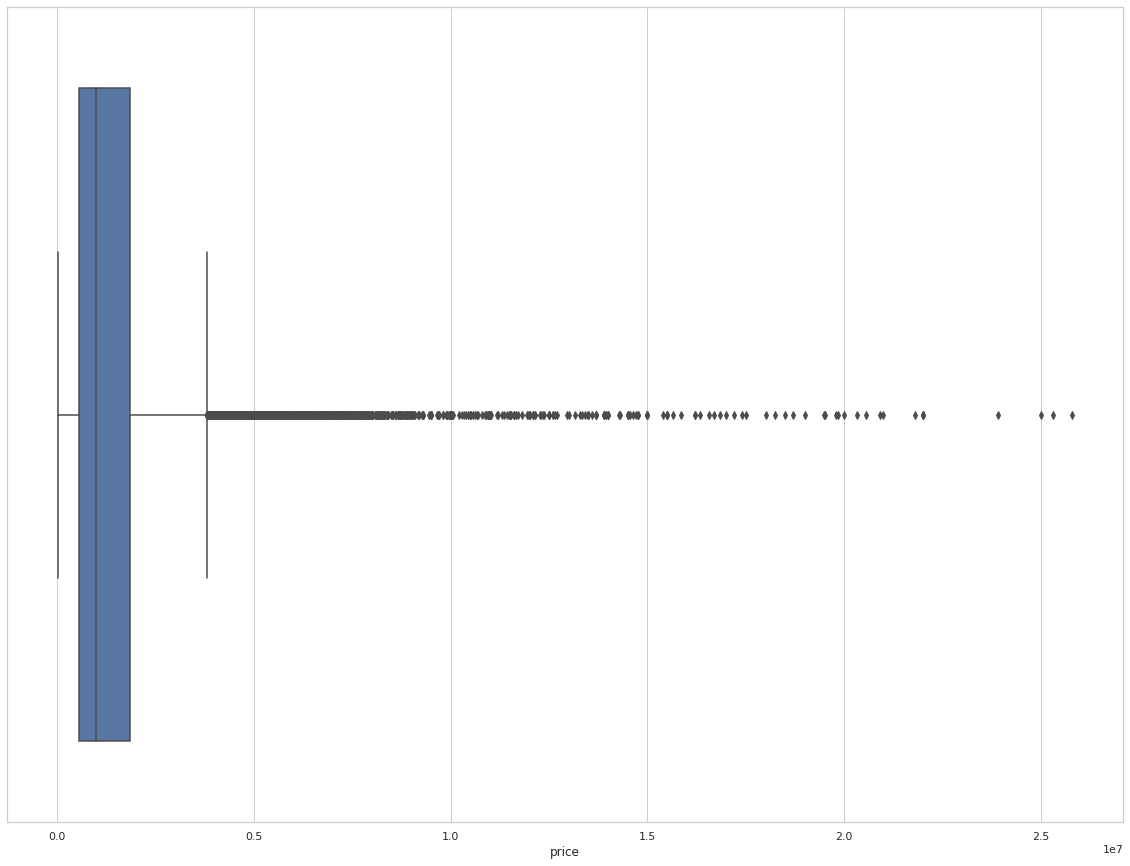

In [448]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data[data['sample']==1]['price'])

### Преобразуем признаки и добавим новые

In [449]:
def mileage_per_year(row):
    return row['mileage']/(2022-row['productionDate'])
data['mileage_year'] = data.apply(mileage_per_year, axis=1)

In [450]:
def popular_color(row):
    if row['color'] in ['чёрный', 'белый']:
        return 1
    else:
        return 0
    
data['pop_color'] = data.apply(popular_color, axis=1)

In [451]:
def premium_brand(row):
    if row['brand'] in ['lexus', 'infiniti', 'bmw', 'volvo', 'audi', 'mercedes']:
        return 1
    else:
        return 0
    
data['premium_brand'] = data.apply(premium_brand, axis=1)

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74664 entries, 0 to 74664
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bodyType             74664 non-null  object 
 1   brand                74664 non-null  object 
 2   color                74664 non-null  object 
 3   engineDisplacement   74520 non-null  object 
 4   enginePower          74664 non-null  int16  
 5   fuelType             74664 non-null  object 
 6   mileage              74664 non-null  int32  
 7   model_name           74664 non-null  object 
 8   numberOfDoors        74664 non-null  int8   
 9   productionDate       74664 non-null  int16  
 10  vehicleTransmission  74664 non-null  object 
 11  vendor               74664 non-null  object 
 12  Владельцы            74664 non-null  int8   
 13  ПТС                  74664 non-null  object 
 14  Привод               74664 non-null  object 
 15  Руль                 74664 non-null 

In [453]:
data['Руль'] = data['Руль'].apply(lambda x: 1 if x=='Левый' else 0)

In [454]:
data['ПТС'] = data['ПТС'].apply(lambda x: 1 if x == 'Оригинал' else 0)

In [483]:
data['vendor'] = data['vendor'].apply(lambda x: 1 if x == 'EUROPEAN' else 0)

In [456]:
data = pd.get_dummies(data, columns=['fuelType','Привод','numberOfDoors', 'vehicleTransmission'])

#### Закодируем бренды числами в соответствии с увеличением средней стоимости

In [457]:
table_brand = pd.pivot_table(data[data['sample']==1], values='price', index=['brand'], aggfunc=np.mean).sort_values('price')
table_brand

,price
brand,
honda,6.208555e+05
mitsubishi,7.836795e+05
skoda,8.493407e+05
nissan,8.957642e+05
volvo,1.059966e+06
volkswagen,1.075450e+06
infiniti,1.496213e+06
audi,1.530967e+06
toyota,1.737978e+06


In [458]:
table_brand = pd.pivot_table(data[data['sample']==1], values='price', index=['brand'], aggfunc=np.mean).sort_values('price')
brand_rank = table_brand.index.to_list()

def brand_encoding(row):
    for count, brand in enumerate(brand_rank):
        if row['brand'] == brand:
            return count
        else:
            continue
data['brand_code'] = data.apply(brand_encoding, axis=1)

In [459]:
table_bodyType = pd.pivot_table(data[data['sample']==1], values='price', index=['bodyType'], aggfunc=np.mean).sort_values('price')
bodyType_rank = table_bodyType.index.to_list()

def bodyType_encoding(row):
    for count, body in enumerate(bodyType_rank):
        if row['bodyType'] == body:
            return count
        else:
            continue
data['bodyType_code'] = data.apply(bodyType_encoding, axis=1)

In [461]:
data['bodyType_code'].value_counts().sort_index()

0        19
1         3
2         2
3        33
4       311
5       811
6      1075
7       155
8      4374
9         6
10     2552
11        2
12     5089
13    26345
14       12
15       11
16      232
17      655
18     1840
19    29095
20     1711
21        4
22      165
23      150
24       12
Name: bodyType_code, dtype: int64

In [462]:
table_color = pd.pivot_table(data[data['sample']==1], values='price', index=['color'], aggfunc=np.mean).sort_values('price')
color_rank = table_color.index.to_list()

def color_encoding(row):
    for count, color in enumerate(color_rank):
        if row['color'] == color:
            return count
        else:
            continue
data['color_code'] = data.apply(color_encoding, axis=1)

In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74664 entries, 0 to 74664
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bodyType                              74664 non-null  object 
 1   brand                                 74664 non-null  object 
 2   color                                 74664 non-null  object 
 3   engineDisplacement                    74520 non-null  object 
 4   enginePower                           74664 non-null  int16  
 5   mileage                               74664 non-null  int32  
 6   model_name                            74664 non-null  object 
 7   productionDate                        74664 non-null  int16  
 8   vendor                                74664 non-null  int64  
 9   Владельцы                             74664 non-null  int8   
 10  ПТС                                   74664 non-null  int64  
 11  Руль           

In [487]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74664 entries, 0 to 74664
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bodyType                              74664 non-null  object 
 1   brand                                 74664 non-null  object 
 2   color                                 74664 non-null  object 
 3   engineDisplacement                    74520 non-null  object 
 4   enginePower                           74664 non-null  int16  
 5   mileage                               74664 non-null  int32  
 6   model_name                            74664 non-null  object 
 7   productionDate                        74664 non-null  int16  
 8   vendor                                74664 non-null  int64  
 9   Владельцы                             74664 non-null  int8   
 10  ПТС                                   74664 non-null  int64  
 11  Руль           

<AxesSubplot:>

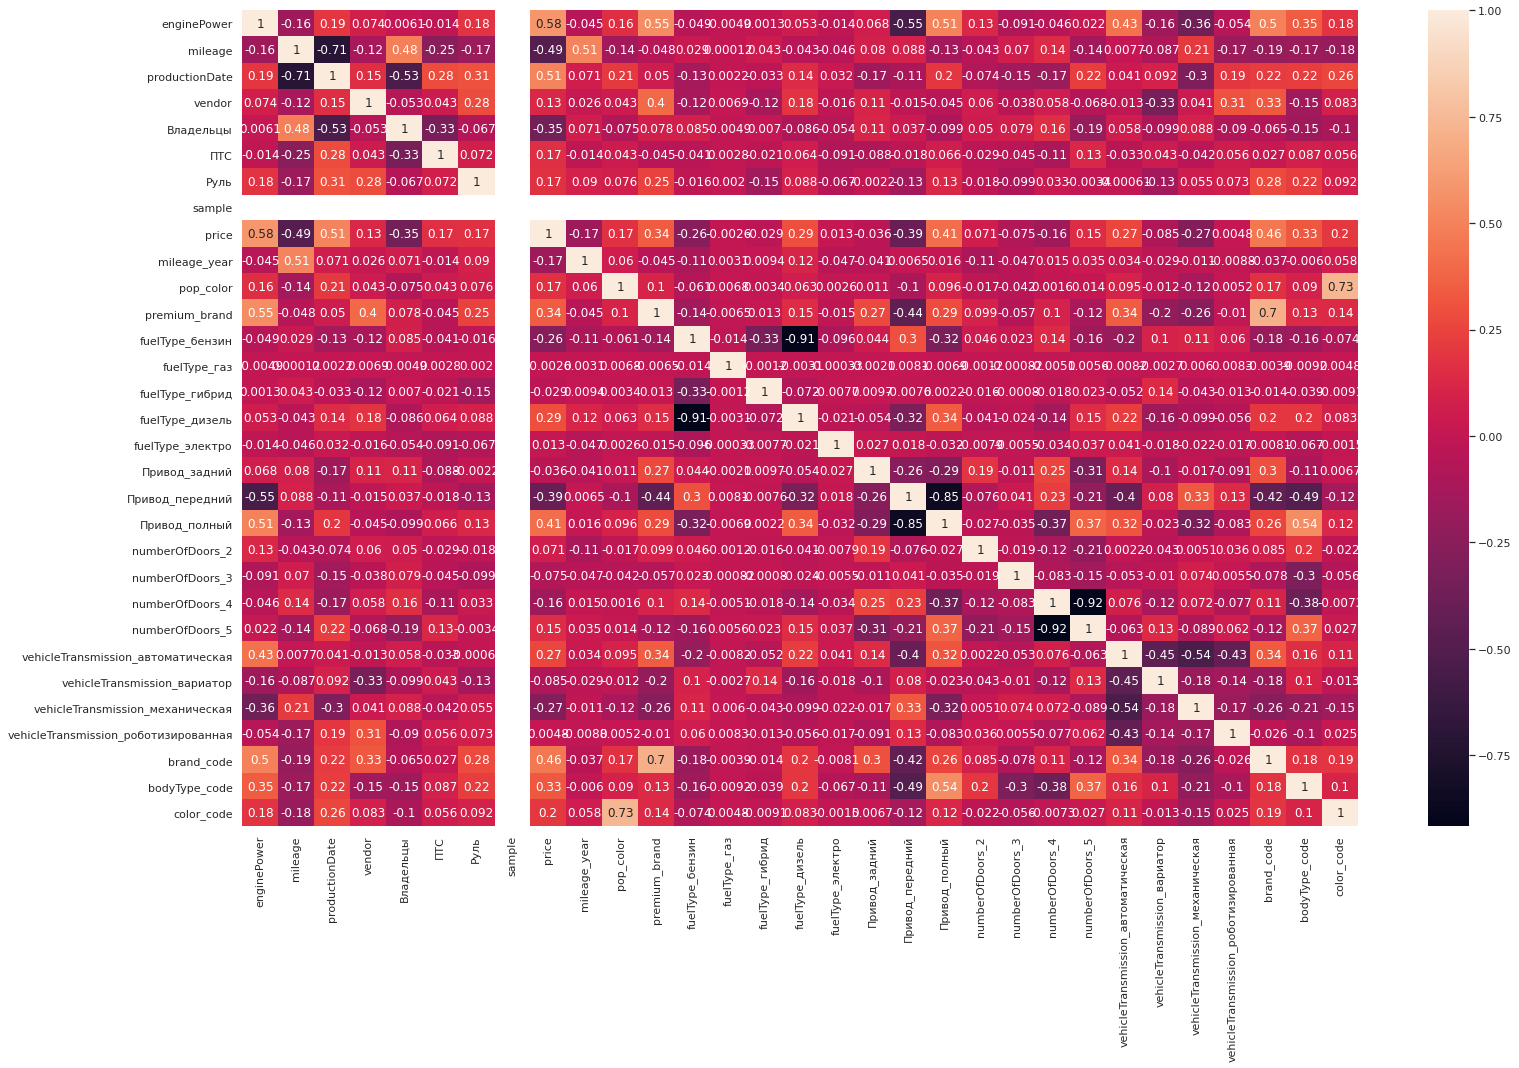

In [484]:
plt.rcParams['figure.figsize'] = (25,15)
sns.heatmap((data[data['sample']==1]).corr(), annot=True)

In [488]:
pd.pivot_table(data[data['sample']==1], values='price', index=['engineDisplacement'], aggfunc=np.mean).sort_values('price')

,price
engineDisplacement,
1.7,2.940403e+05
2.3,3.245440e+05
1.0,3.463469e+05
1.1,4.305714e+05
2.6,4.697024e+05
1.2,5.552137e+05
3.1,5.697938e+05
1.3,5.798446e+05
0.7,6.495728e+05


In [490]:
# Признаки "engineDisplacement" и "model_name" будем кодировать с помощью get_dummies
data = pd.get_dummies(data, columns=['engineDisplacement', 'model_name'])

In [485]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for feature in ['enginePower', 'mileage', 'productionDate', 'mileage_year']:
    scaler.fit(data[[feature]])
    data[f'{feature}_code'] = scaler.transform(data[[feature]])

In [492]:
data.drop(columns=['bodyType', 'brand', 'color', 'enginePower', 'productionDate', 'mileage', 'mileage_year'],inplace=True)

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74664 entries, 0 to 74664
Columns: 708 entries, vendor to model_name_zest
dtypes: float64(4), int64(10), int8(1), uint8(693)
memory usage: 58.0 MB


In [507]:
features_1 = data.columns.to_list()[:31]

<AxesSubplot:>

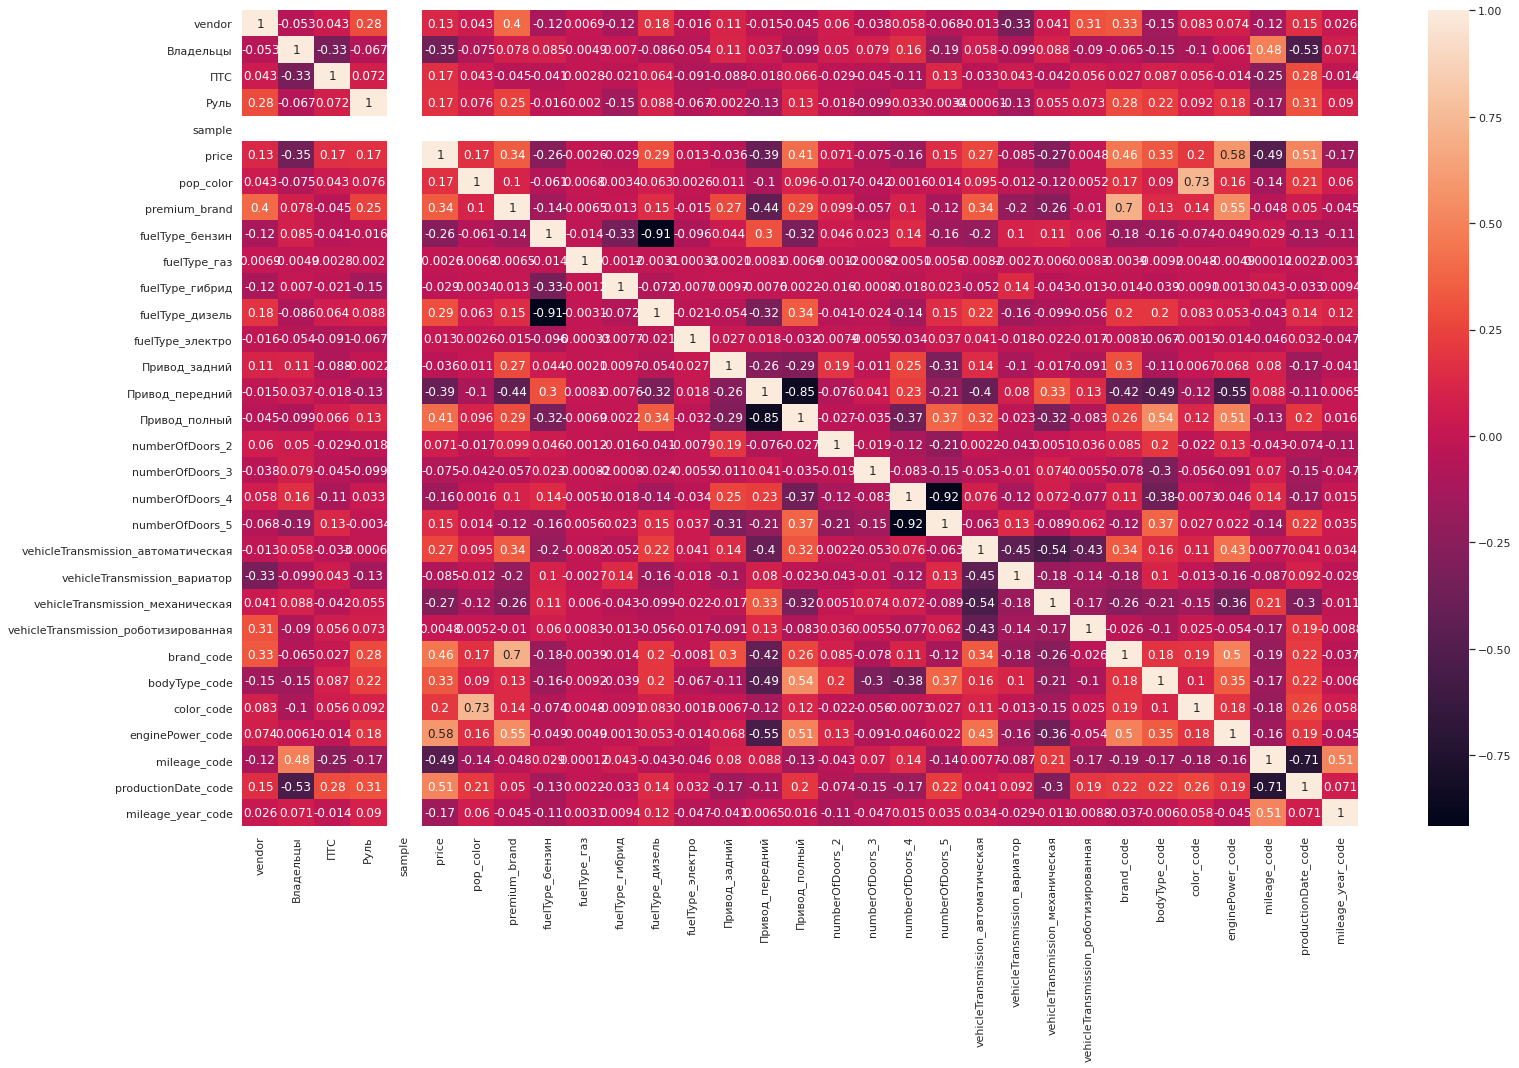

In [508]:
plt.rcParams['figure.figsize'] = (25,15)
sns.heatmap((data[data['sample']==1][features_1]).corr(), annot=True)

In [510]:
data.to_csv('all_data.csv')